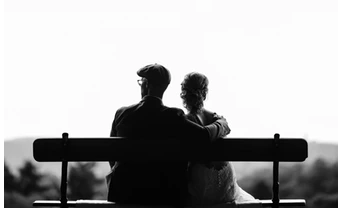

**Proyecto Fin de Master basado en los datasets MRI and Alzheimers
**
(Magnetic Resonance Imaging Comparisons of Demented and Nondemented Adults)

**INDICE DE CONTENIDOS
**

Realizamos todos los pasos propuestos para el Proyecto de fin de Master en los 2 datasets de la base de datos MRI and Alzheimers. Como el dataset 2, de IRM longitudinales, tiene más variables, y de importancia clave, como el diagnóstico final de cada paciente y el número de visitas diagnósticas, aplicaremos a este último más análisis y modelos predictivos para optimizar los resultados.

**A) Dataset 1: Datos de IRM (Imágenes por Resonancia Magnética) de sección transversal 
**
1.      Introducción con el objetivo del análisis

2.      Carga de los datos y análisis descriptivo, visualización de las relaciones entre variables

3.      Análisis exploratorio apoyado en algún método NO supervisado

4.      Selección de variables, elección, construcción y optimización de algún modelo de Machine Learning Supervisado

5.      Evaluación y comparación de modelos

**B) Dataset 2: Datos de IRM longitudinales 
**
1.      Introducción con el objetivo del análisis

2.      Carga de los datos y análisis descriptivo, visualización

3.      Análisis exploratorio apoyado en algún método NO supervisado

4.      Selección de variables, elección, construcción y optimización de algún modelo de Machine Learning Supervisado

5.      Evaluación y comparación de modelos

6.      Informe final incluyendo visualización de resultados



In [1]:
# Importamos Pandas, numpy, y seaborn y matplotlib para visualización de los datos
import pandas as pd
import seaborn as sns
sns.set_palette("husl")
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

**1.- Introducción con el objetivo del análisis
**
Tenemos 2 datasets relacionados con MRI, demencia y Alzheimer.

Nuestro objetivo es analizar ambos datasets para conocer las posibles relaciones entre las diferentes mediciones de diferentes variables y la implementación de modelos de Machine Learning que puedan predecir un diagnóstico de algún tipo de demencia o Alzheimer en pacientes de los que dispongamos de datos equivalentes. cabe destacar que los diagnósticos y grados de gravedad de la enfermedad que tenemos en estos datos se refieren sobre todo a demencia en general. La enfermedad de Alzheimer es uno de esos tipos de demencia (Para más información sobre el contexto e investigaciones de estas patologías, ver documento adjunto)

Las columnas o variables que encontramos en los 2 datasets que vamos a analizar son las siguientes: (Para más información sobre cada variable y su contextualización en el posible diagnóstico de algún tipo de demencia o Alzheimer ver el documento adjunto): Ambos datasets forman parte de los recursos del proyecto Oasis-Brains.

EDUC/Educ : Años de educación / 
SES : Status socioeconómico / 
MMSE : Mini examen del estado mental (Mini Mental State Examination) / 
CDR : Clasificación de demencia clínica (Clinical Dementia Rating) / 
eTIV : Volumen Intracraneal Total Estimado / 
nWBV :Volumen total del cerebro normalizado / 
ASF : Atlas Scaling Factor / 
Subject ID/ID : Identificación del paciente / 
MRI ID Codigo Identificacion de la resonancia (sólo en dataset longitudinal) / 
Group : Clase (Demented, Nondemented, converted) (sólo en dataset longitudinal) / 
Visit : Orden de visita (sólo en dataset longitudinal) / 
MR Delay : Tiempo de retraso en la resonancia (contraste) / 
M/F : Género / 
Hand : Diestro o zurdo / 
Age : Edad / 


**A) Dataset 1: Datos de IRM (Imágenes por Resonancia Magnética) de sección transversal 
(oasis_cross-sectional.csv)**





**Descripción del dataset 1 (oasis_cross-sectional.csv)**: Datos de IRM (Imágenes por Resonancia Magnética) de sección transversal en adultos mayores jóvenes, de edad media, tanto con la enfermedad de Alzheimer como sin ella: este conjunto consiste en una colección de 416 sujetos de 18 a 96 años de edad. Para cada sujeto, 3 o 4 exploraciones de IRM individuales ponderadas en T1 obtenidas en una sola sesión. Se incluyen sesiones de escaneo. Los sujetos son todos diestros e incluyen tanto a hombres como a mujeres. 100 de los sujetos incluidos mayores de 60 años han sido diagnosticados clínicamente con enfermedad de Alzheimer (EA) muy leve a moderada. Además, se incluye un conjunto de datos de confiabilidad que contiene 20 sujetos sin Alzheimer a los que se tomaron imágenes en una visita posterior dentro de los 90 días de su sesión inicial.

**2.      Carga de los datos y análisis descriptivo - dataset transversal
**

In [2]:
# Importamos el dataset de resonancias de sección transversal, cross sectional, para hacer un análisis exploratorio
# EDA (Exploratory Data Analysis)
dfcross=pd.read_csv('../input/oasis_cross-sectional.csv')
dfcross.info()
dfcross.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
ID       436 non-null object
M/F      436 non-null object
Hand     436 non-null object
Age      436 non-null int64
Educ     235 non-null float64
SES      216 non-null float64
MMSE     235 non-null float64
CDR      235 non-null float64
eTIV     436 non-null int64
nWBV     436 non-null float64
ASF      436 non-null float64
Delay    20 non-null float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


**3.      Análisis exploratorio dataset transversal
**

In [3]:
# Buscamos si el dataset contiene valores nulos y contamos el número total de filas en cada columna que contienen nulos
# Podemos comprobar como las variables EDUC, SES, CDR y MMSE contienen bastantes valores nulos
# El mayor número de valores nulos se encuentra en SES, Status Socioeconómico
dfcross.isna().sum()

ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64

In [4]:
# Como consta en los datos descriptivos del dataset de corte transversal hay 20 observaciones que son de confiabilidad
# Los observamos con .tail y vemos que muchos de ellos tienen datos nulos. Procedemos a eliminar esas observaciones
dfcross.tail(30)
dfcross.drop(dfcross.index[416:436],axis=0, inplace=True)

In [5]:
#Comprobamos que sigue habiendo bastantes valores nulos en el dataset
dfcross.isna().sum()
# Eliminamos las variables que no tienen interés
dfcross = dfcross.drop(['Delay', 'Hand','ID'], axis=1) # Drop unnecessary columns
# Eliminamos las filas con valores nulos
dfcross2 = dfcross.dropna(axis=0, how='any')
pd.isnull(dfcross2).sum()


M/F     0
Age     0
Educ    0
SES     0
MMSE    0
CDR     0
eTIV    0
nWBV    0
ASF     0
dtype: int64

In [6]:
# Como podemos comprobar ahora tenemos un dataset de sección transversal con 216 observaciones y sin datos nulos
dfcross2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 415
Data columns (total 9 columns):
M/F     216 non-null object
Age     216 non-null int64
Educ    216 non-null float64
SES     216 non-null float64
MMSE    216 non-null float64
CDR     216 non-null float64
eTIV    216 non-null int64
nWBV    216 non-null float64
ASF     216 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 16.9+ KB


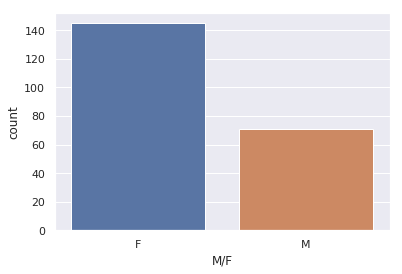

In [7]:
# Vamos a realizar un EDA / análisis exploratorio de datos del dataset Cross-sectional
# En este dataset, a diferencia del longitudinal, no tenemos la variable Group, que nos dice si hay demencia o no
# La variable más fiable para saber si el paciente tiene demencia en este dataset es CDR (Clinical Dementia Rating)
# En primer lugar vamos a ver como son las observaciones y su CDR 
# El CDR en este dataset está entre 0 y 2, el máximo de la escala CDR, demencia severa, es 3.
sns.countplot(x='M/F', data=dfcross2)

En la muestra que estamos analizando de datos de corte transversal de MRI, tenemos más del doble de mujeres que hombres

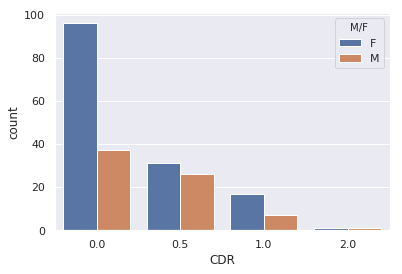

In [8]:
sns.countplot(x='CDR', hue="M/F", data=dfcross2)

En el dataset preprocesado y limpio, encontramos unos 80 pacientes con algún tipo de demencia, entre muy leve y moderada la mayoría. (0.5 a 2).

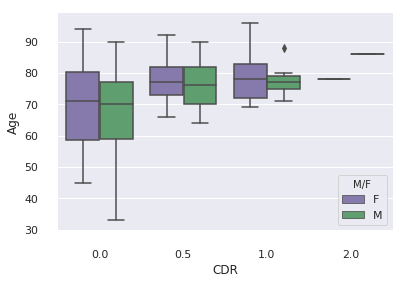

In [9]:
# Analizamos la relación entre CDR (Clinical Dementia Rating) y la edad según genero
sns.boxplot(x="CDR", y="Age",
            hue="M/F", palette=["m", "g"],
            data=dfcross2)
sns.despine(offset=10, trim=True)

En el gráfico superior se comprueba como a medida que aumenta la edad también va aumentando el CDR, la media de edad de los pacientes con más CDR es superior a los de menos CDR, tanto en hombres como en mujeres.

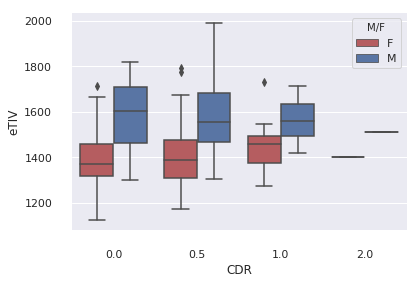

In [10]:
sns.boxplot(x="CDR", y="eTIV",
            hue="M/F", palette=["r", "b"],
            data=dfcross2)
sns.despine(offset=10, trim=True)

En el gráfico superior comprobamos que a medida que aumenta el CDR, hay una tendencia a que vaya disminuyendo eTIV, el volumen intracraneal estimado, especialmente en el caso de los hombres (M). Las mujeres tienen un volumen intracraneal menor que los hombres, rasgo no asociado en este caso con la demencia o Alzheimer.

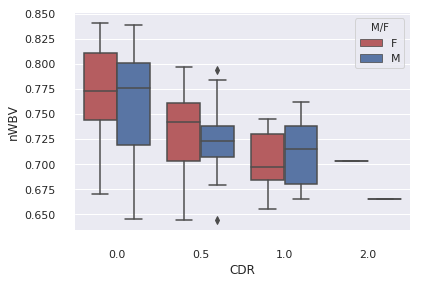

In [11]:
sns.boxplot(x="CDR", y="nWBV",
            hue="M/F", palette=["r", "b"],
            data=dfcross2)
sns.despine(offset=10, trim=True)

En este gráfico se comprueba una tendencia incluso más aguda que el caso anterior a que el volumen total del cerebro normalizaro (nWBV) disminuya claramente a medida que aumenta el CDR, o lo que es lo mismo, los síntomas de padecer algún tipo de demencia, tanto en hombres como en mujeres.

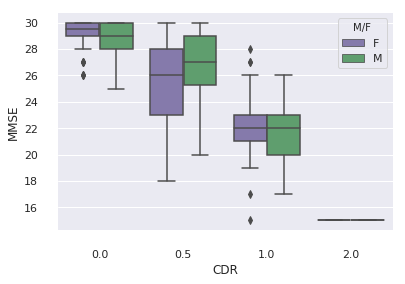

In [12]:
# Analizamos la relación entre CDR y MMSE
sns.boxplot(x="CDR", y="MMSE",
            hue="M/F", palette=["m", "g"],
            data=dfcross2)
sns.despine(offset=10, trim=True)

Está claro que en ambos sexos a medida que aumenta la puntuación del MMSE (Mini Mental Examination), la tendencia es que el CDR (Clinical Dementia Rating) disminuya, y a la inversa. A más puntación del MMSE menos probabilidad de tener algún tipo o inicio de demencia o Alzheimer.

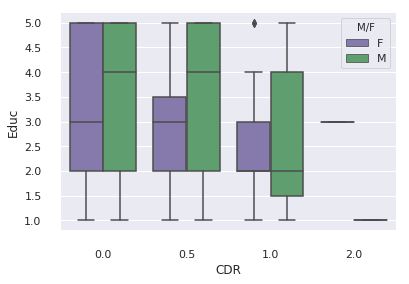

In [13]:
# Se comprueba también en este gráfico que hay una tendencia a que el CDR aumente cuando disminuya el nivel educativo
sns.boxplot(x="CDR", y="Educ",
            hue="M/F", palette=["m", "g"],
            data=dfcross2)
sns.despine(offset=10, trim=True)

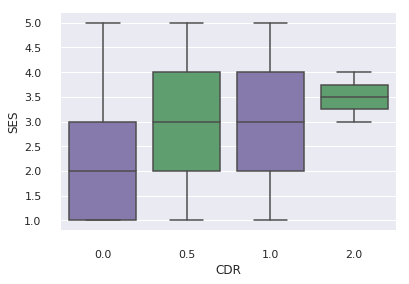

In [14]:
# También se comprueba que en este dataset las personas con mayor CDR tienen status socioeconomico alto
sns.boxplot(x="CDR", y="SES", palette=["m", "g"],
            data=dfcross2)
sns.despine(offset=10, trim=True)

También se comprueba que en este dataset que las personas con mayor CDR tienen status socioeconomico alto, algo que quizás sea propio de este dataset, no extensible a todos los enfermos que padecen demencia.

**3. Selección de variables, elección, construcción y optimización de algún modelo de Machine Learning Supervisado** **(dataset transversal o cross-sectional)**

**- Modelo de regresión con ExtraTreesregressor**

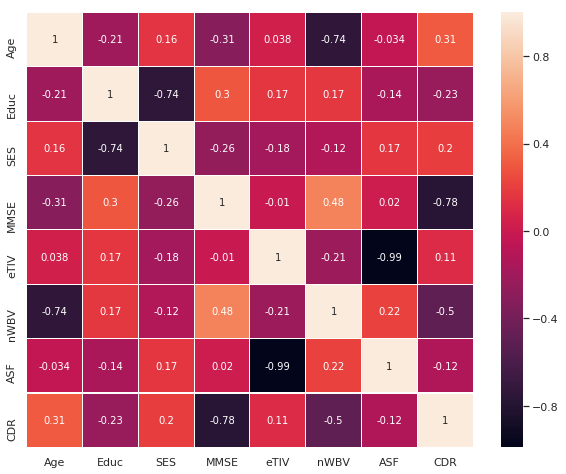

In [15]:
# Vamos a construir, aplicar y comparar varios modelos que predigan el diagnóstico basándonos en el CDR 
# (Ya que no existe variable de diagnostico definitivo en este dataset)

# En primer lugar vamos aplicar el modelo ExtraTreesregresor:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
# Definimos las variables predictoras y la variable objetivo:
# Tras analizar la matriz de correlación que figura debajo, combinamos diferentes variables y el mejor resultado
# lo obtenemos con estas características predictivas:
features = ["M/F","Age","Educ","SES","MMSE","eTIV","nWBV","ASF"]

# Convertimos en dummies / binarias las variables categóricas (en este caso será M/F solamente)
x_data = pd.get_dummies(dfcross2[features])
# La variable a predecir será CDR
y_data = dfcross2['CDR']
# Analizamos la matriz de correlación entre variables
plot_data = dfcross2[features + ['CDR']]
plt.figure(figsize=(10,8))
sns.heatmap(plot_data.corr(), annot=True, linewidth=.2)


In [16]:
# Dividimos los datos en entrenamiento y test tanto para predictoras como para target
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.2, random_state=0)
# Observamos como quedarían los datos:
print('X_TRAIN TAMAÑO: ', x_train.shape)
print('X_TEST TAMAÑO: ', x_test.shape)
print('Y_TRAIN TAMAÑO: ', y_train.shape)
print('Y_TEST TAMAÑO: ', y_test.shape)

X_TRAIN TAMAÑO:  (172, 9)
X_TEST TAMAÑO:  (44, 9)
Y_TRAIN TAMAÑO:  (172,)
Y_TEST TAMAÑO:  (44,)


In [17]:
# Creamos nuestro modelo y calculamos el error absoluto medio y el score, que es el coeficiente de determinación R2

etr = ExtraTreesRegressor(random_state=4, n_estimators=100, max_features='sqrt')
etr.fit(x_train, y_train)
pred = etr.predict(x_test)

# Calculamos el error y el coeficiente de determinación R2 con el método score: 
# (el valor máximo de R2 es 1 (100%), en ese caso indicaria una exactitud perfecta del modelo)
print('Error absoluto medio (Mean Absolute Error): ', round(mean_absolute_error(y_test, pred), 5))
print('Coeficiente R2 (score): ', round(etr.score(x_test, y_test), 2) * 100, '%')

Error absoluto medio (Mean Absolute Error):  0.14989
Coeficiente R2 (score):  55.00000000000001 %


**- Modelo de clasificación a través de red neuronal basada en la libreria Keras de deep learning**

In [18]:
# Vamos a aplicar ahora un algoritmo de clasificación secuencial a través de una red neuronal basada en Keras
# El modelo nos diría si un determinado paciente tiene algún tipo de demencia, sin determinar que grado concreto
# Para ello volvemos a definir y ordenar las columnas.

cols=["M/F", "Age", "Educ", "SES", "MMSE","eTIV", "nWBV", "ASF", "CDR"]
dfcross2=dfcross2[cols]

# Como en este dataset la columna clave objetivo es CDR, vamos a renombrarla y posteriormente convertirla en binaria
dfcross2.rename(columns = {'CDR':'DEMENCIA'}, inplace = True)
dfcross2.info()

# Convertimos la variable Masculino / Femenino en binaria
dfcross2['M/F'] = dfcross2['M/F'].replace(['F','M'], [0,1])
featurescross=["M/F", "Age", "Educ", "SES", "MMSE","eTIV", "nWBV", "ASF"]
targetcross=["DEMENCIA"]

X = dfcross2[featurescross].values
y = dfcross2[targetcross].values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 415
Data columns (total 9 columns):
M/F         216 non-null object
Age         216 non-null int64
Educ        216 non-null float64
SES         216 non-null float64
MMSE        216 non-null float64
eTIV        216 non-null int64
nWBV        216 non-null float64
ASF         216 non-null float64
DEMENCIA    216 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 16.9+ KB


In [19]:
# Convertimos la variable DEMENCIA a binaria: si el CDR es mayor de 0 ello indica algún tipo de demencia

# Cuando el sujeto tenga algún tipo de demencia, basandose en su CDR, el valor de DEMENCIA será 1, si no tiene, 0
ys = []
for x in y:
   if x > 0:
     
       x = 1
   else: 
       x = 0
   ys.append(x)

# Dividimos el dataset en sets de training y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, ys, test_size = 0.2, random_state = 0)

# # Establecesmos un seed para la reproducibilidad del modelo
seed = 7
np.random.seed(seed)

# Feature Scaling / Escalamos las características
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Importamos Keras y sus librerias 
import keras
from keras.models import Sequential
from keras.layers import Dense 
from keras.utils import np_utils

# Inicializamos el algoritmo de red neuronal basado en Keras indicando que sea de tipo secuencial
modeloKeras = Sequential()
# Añadimos la capa de inicio y la primera capa oculta 
modeloKeras.add(Dense(activation = 'relu',  input_dim = 8, units = 12, kernel_initializer = 'uniform'))
# Segunda capa oculta
modeloKeras.add(Dense( activation = 'relu', units = 12, kernel_initializer = 'uniform'))
# Tercera capa oculta
modeloKeras.add(Dense( activation = 'relu', units = 12, kernel_initializer = 'uniform'))
# Capa de salida
modeloKeras.add(Dense(activation = 'sigmoid', units = 1, kernel_initializer = 'uniform' ))
# Compilamos el modelo para que calcule la exactitud (accuracy) y el error cuadrático medio (mse)
modeloKeras.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy','mse'])

# Ajustamos el el algoritmo de red neuronal al set de entrenamiento (epochs son las vueltas o iteraciones)
# En el resultado la exactitud del modelo es bastante alta (Accuracy máxima=1), y el error insignificante
# Al ajustar el modelo con fit indicamos también el tamaño del set de validación para calcular val_acc
# Tras varias pruebas se ha ajustado el modelo a 23 epochs, donde se alcanza el rendimiento óptimo.
modeloKeras.fit(X_train, y_train, validation_split=0.2, batch_size = 10, epochs = 23)




Using TensorFlow backend.


Train on 137 samples, validate on 35 samples
Epoch 1/23
137/137 [==============================] - 1s 4ms/step - loss: 0.6930 - acc: 0.5474 - mean_squared_error: 0.2499 - val_loss: 0.6922 - val_acc: 0.6857 - val_mean_squared_error: 0.2495
Epoch 2/23
137/137 [==============================] - 0s 164us/step - loss: 0.6924 - acc: 0.5766 - mean_squared_error: 0.2496 - val_loss: 0.6910 - val_acc: 0.6857 - val_mean_squared_error: 0.2489
Epoch 3/23
137/137 [==============================] - 0s 153us/step - loss: 0.6919 - acc: 0.5766 - mean_squared_error: 0.2494 - val_loss: 0.6896 - val_acc: 0.6857 - val_mean_squared_error: 0.2482
Epoch 4/23
137/137 [==============================] - 0s 177us/step - loss: 0.6912 - acc: 0.5766 - mean_squared_error: 0.2490 - val_loss: 0.6880 - val_acc: 0.6857 - val_mean_squared_error: 0.2474
Epoch 5/23
137/137 [==============================] - 0s 153us/step - loss: 0.6902 - acc: 0.5766 - mean_squared_error: 0.2485 - val_loss: 0.6851 - val_acc: 0.6857 - val_mean

In [20]:
# Dibujamos la curva ROC para el modelo Keras
# fpr: Tasa de falsos positivos  / tpr: Tasa de positivos reales

from sklearn.metrics import roc_curve
y_pred_keras = modeloKeras.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

**- Modelo Random Forest Classifier**

In [21]:
# Creamos un modelo Randomforest con los mismos train y test del modelo Keras y posteriormente comparamos los resultados

from sklearn.ensemble import RandomForestClassifier
# Definimos el modelo y ajustamos los conjuntos de entrenamiento
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score

# Evaluamos el modelo clasificador Random Forest calculando su exactitud/precisión (accuracy)
y_predict=rf.predict(X_test)
acc_rf=accuracy_score(y_test, y_predict)
print("% Exactitud del Modelo RandomForest: ", acc_rf*100)

# Calculamos el area bajo la curva ROC (AUC) a partir de las predicciones del modelo.
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

% Exactitud del Modelo RandomForest:  86.36363636363636


**5. Evaluación y comparación de modelos para el dataset transversal** (cross-sectional)

In [22]:
# Evaluamos el modelo Keras calculando la exactitud y pérdida que alcanza en los datos de validación (test
score = modeloKeras.evaluate(X_test, y_test, verbose=0)

# print (score)
print(modeloKeras.metrics_names, score)
print("Loss: ", score[0])
print("Test accuracy: ", score[1])
print ("Error cuadrático medio: ", score[2])

print("%s: %.2f%%" % (modeloKeras.metrics_names[1], score[1]*100))

['loss', 'acc', 'mean_squared_error'] [0.3244411593133753, 0.8636363636363636, 0.09959263151342218]
Loss:  0.3244411593133753
Test accuracy:  0.8636363636363636
Error cuadrático medio:  0.09959263151342218
acc: 86.36%


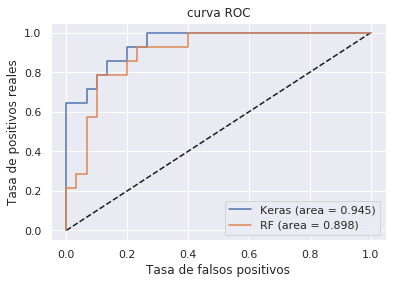

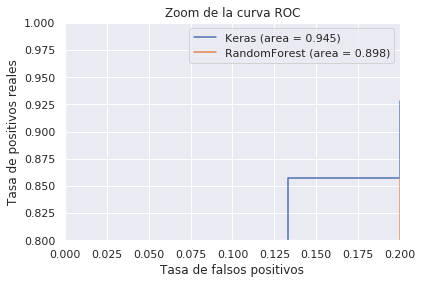

In [23]:
# Dibujamos la curva ROC para el model Keras y el Random Forest y las comparamos
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de positivos reales')
plt.title('curva ROC')
plt.legend(loc='mejor')
plt.show()
# Hacemos zoom en la esquina superior izquierda por si no se vieran las diferencias
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RandomForest (area = {:.3f})'.format(auc_rf))
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de positivos reales')
plt.title('Zoom de la curva ROC')
plt.legend(loc='mejor')
plt.show()

**Comparación de modelos
**

**- Modelo con ExtratreesRegressor:**
Mean Absolute Error:  0.14989 / Coeficiente R2 o Score:  55 %. Con método fill: 65 % Score. Es un algoritmo de regresión lineal que pretende predecir el valor de CDR a partir del resto de variables indicadas como features.

**- Modelo Random Forest Classifier**. En los gráficos superiores se comprueba como el area bajo la curva ROC del modelo Random Forest tiene un resultado muy bueno aunque que la del modelo Keras es mayor. La exactitud también es buena y cercana al 90 % pero la del modelo Keras es también mayor.

**- Modelo de red neuronal con clasificador basado en Keras**
El resultado del modelo con el algoritmo de clasificación basado en la libreria Keras, como hemos podido ver es algo mejor que el anterior Random Forest, con una accuracy o exactitud cercana al 90 % y mse o error cuadrático de 0.10 en el último epoch o iteración del algoritmo clasificador secuencial basado en Keras. 

Estos 2 últimos modelos nos predicen si el paciente puede presentar algún tipo de demencia prediciendo a partir del resto de variables si su CDR es mayor que 0. Se podrían ajustar para predecir un diagnóstico a partir de un determinado grado de demencia haciendo que x fuese mayor que 0.5, 1, 2, etc, según las diferentes 5 posibles puntuaciones de CDR (Clinical Dementia Rating), correspondiendo la puntuación 0 a una persona sana, y la puntuación máxima, 5, a una persona con demencia severa. (Para más información sobre el CDR ver documento adjunto).

**B) Dataset 2: Datos de IRM longitudinales** (oasis_longitudinal.csv)


**Descripción del Dataset 2 (oasis_longitudinal.csv)**: Datos de IRM longitudinales en adultos mayores no dementes y dementes o con enfermedad de Alzheimer: este conjunto consiste en una recopilación longitudinal de 150 sujetos de 60 a 96 años. Cada sujeto se examinó en dos o más visitas, separadas por al menos un año para un total de 373 sesiones de imágenes. Para cada sujeto, se incluyen 3 o 4 exploraciones de MRI ponderadas en T1 individuales obtenidas en sesiones de exploración individuales. Los sujetos son todos diestros e incluyen tanto a hombres como a mujeres. 72 de los sujetos se caracterizaron como no dementes a lo largo del estudio. 64 de los sujetos incluidos se caracterizaron como dementes en el momento de sus visitas iniciales y permanecieron así en las exploraciones posteriores, incluidas 51 personas con enfermedad de Alzheimer de leve a moderada. Otros 14 sujetos se caracterizaron como no dementes en el momento de su visita inicial y posteriormente se caracterizaron como dementes en una visita posterior.

**1. Introducción con el objetivo del análisis
**

**2. Carga de los datos y análisis descriptivo** (dataset longitudinal)

In [24]:
# A continuaciòn, vamos a analizar y a trabajar ahora con el otro dataset, el longitudinal
# La característica clave de este dataset es que contiene la columna "Group", 
# La columna "Group" clasifica a los pacientes como enfermos de algún tipo de demencia (Demented, Converted) o sanos 
# Visualizamos las 40 primeras observaciones del dataframe longitudinal que hemos creado.
# Podemos observar como los sujetos que están clasificados como "Converted" lo están en todas las visitas que realizan
# "Converted" son pacientes diagnosticados con algún tipo de demencia que inicialmente estaban sanos.
# Leemos el CSV longitudinal con la función read_csv de Pandas 
dflong = pd.read_csv('../input/oasis_longitudinal.csv')
# Imprimimos la info básica del dataset
dflong.info()
dflong.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
Subject ID    373 non-null object
MRI ID        373 non-null object
Group         373 non-null object
Visit         373 non-null int64
MR Delay      373 non-null int64
M/F           373 non-null object
Hand          373 non-null object
Age           373 non-null int64
EDUC          373 non-null int64
SES           354 non-null float64
MMSE          371 non-null float64
CDR           373 non-null float64
eTIV          373 non-null int64
nWBV          373 non-null float64
ASF           373 non-null float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [25]:
# Aplicamos describe al dataframe longitudinal para ver sus características estadísticas principales
dflong.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


**3. Análisis exploratorio apoyado en algún método NO supervisado y visualización** (dataset longitudinal)

In [26]:
# Buscamos si el dataset longitudinal contiene valores nulos y contamos el número total de filas en cada columna que contienen nulos
# Podemos comprobar como solamente las variables SES y MMSE contienen algunos valores nulos
# El mayor número de valores nulos se encuentra en SES, Status Socioeconómico
dflong.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [27]:
# En este caso, en lugar de eliminarlos como hicimos con el anterior dataset, probamos otras opciones
# Sustituimos los valores nulos con la mediana en el caso de la columna SES al ser una variable discreta
# y con la media en el caso de MMSE
dflong["SES"].fillna(dflong["SES"].median(), inplace=True)
dflong["MMSE"].fillna(dflong["MMSE"].mean(), inplace=True)

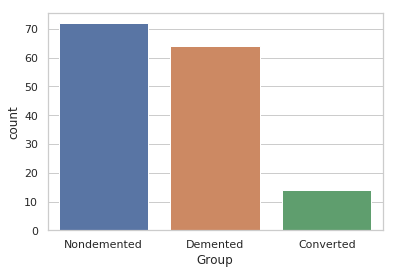

In [28]:
# Los pacientes del dataset han podido ser analizados entre 1 y 3 veces, y su estado o clase con respecto a la
# enfermedad puede haber variado
# Vamos a analizar como era su situación en el primer análisis, es decir, con Visit=1 y llamamos al Dataframe dfinal
# La categoria converted indica que a la persona se le detectó algun tipo de demencia tras la primera visita
# En un principio no convertimos la categoria "converted" en "demented" para explorar los datos, más adelante sí.
# El objetivo del análisis no es conocer la evolución de los pacientes sino analizar la relación entre variables
sns.set_style("whitegrid")
dvisita1 = dflong.loc[dflong['Visit'] == 1]
dvisita1 = dvisita1.reset_index(drop=True) #Reseteando el indice
sns.countplot(x='Group', data=dvisita1)

El objetivo de nuestra exploración y análisis no es conocer la evolución de los pacientes sino analizar la relación de los datos de todas las variables analizadas y su influencia en el diagnóstico final. 

Por esta razón posteriormente utilizaremos para los análisis principales los datos de todas las visitas.
En el gráfico superior podemos comprobar como se confirma la información previa que se nos proporcionó del dataset:
Hay 72 personas que no han sido diagnosticadas con ningún tipo de demencia, 64 diagnosticadas con demencia y 14 personas que en un primer momento no se las consideraba enfermas de demencia y posteriormente sí

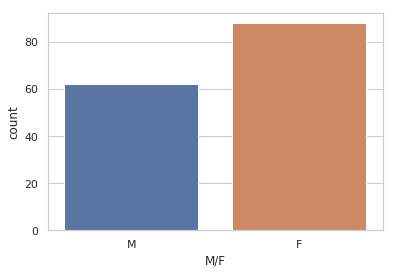

In [29]:
# Datos totales de la primera visita
sns.countplot(x='M/F', data=dvisita1)

Como observamos en el gráfico superior, hay mas representación femenina que masculina en el dataset

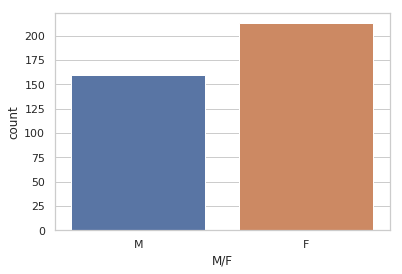

In [30]:
# Datos de todas las visitas en las que se examinaron pacientes.
sns.countplot(x='M/F', data=dflong)

Observamos como la proporción de hombres y mujeres es similar en ambos gráficos 

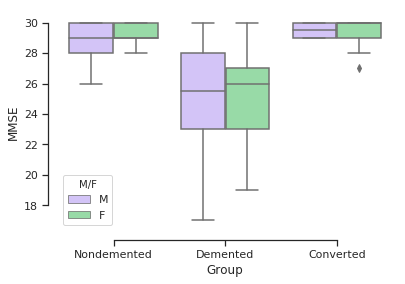

In [31]:
sns.set(style="ticks", palette="pastel")

# Analizamos la relación entre MMSE y el diagnóstico según genero
sns.boxplot(x="Group", y="MMSE",
            hue="M/F", palette=["m", "g"],
            data=dvisita1)
sns.despine(offset=10, trim=True)

Se observa que la puntación del MMSE (Mini MEntal Examination) es menor en las personas diagnosticadas con algún tipo de demencia, no hay diferencias significativas entre géneros

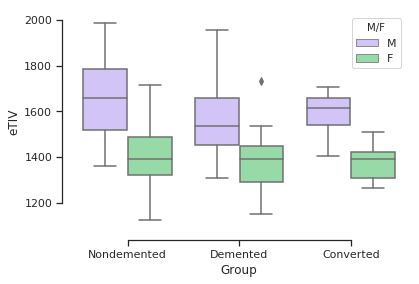

In [32]:
# Analizamos la relación entre eTIV (volumen intracraneal estimado) y el diagnóstico según género
sns.boxplot(x="Group", y="eTIV",
            hue="M/F", palette=["m", "g"],
            data=dvisita1)
sns.despine(offset=10, trim=True)

Al igual que en el anterior dataset, se observa una tendencia a que el volumen intracraneal estimado disminuya en los pacientes que padecen demencia.

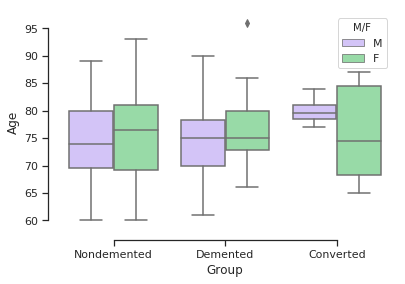

In [33]:
# Analizamos la relación entre la edad (Age) y el diagnóstico según genero
sns.boxplot(x="Group", y="Age",
            hue="M/F", palette=["m", "g"],
            data=dvisita1)
sns.despine(offset=10, trim=True)

En este caso no hay apenas diferencias significativas entre los diagnosticados con demencia y los sanos, la media de edad es la misma. Si tiene una media de edad superior la categoría de los converted.

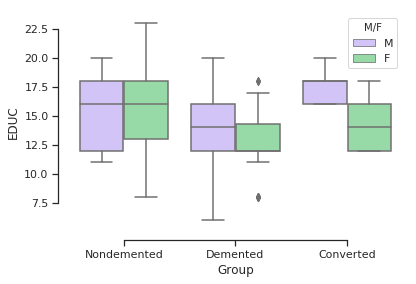

In [34]:
# Analizamos la relación entre el nivel educativo (EDUC) y el diagnóstico según género
sns.boxplot(x="Group", y="EDUC",
            hue="M/F", palette=["m", "g"],
            data=dflong)
sns.despine(offset=10, trim=True)

Se comprueba que hay un mayor número de pacientes sanos con nivel educativo más elevado que los enfermos, así como la media del nivel educativo de los sanos es mayor también, hay alguna diferencia significativa entre hombres y mujeres en los diagnosticados como enfermos, no en los sanos.

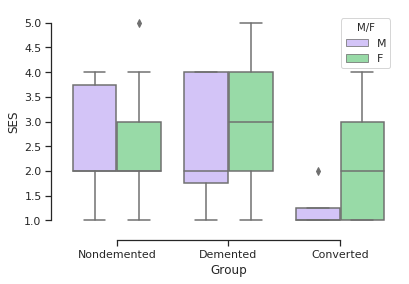

In [35]:
# Analizamos la relación entre el nivel socioeconómico (SES) y el diagnóstico según género
sns.boxplot(x="Group", y="SES",
            hue="M/F", palette=["m", "g"],
            data=dvisita1)
sns.despine(offset=10, trim=True)

Parece que no podemos inferir una relación clara entre el nivel socioeconómico y el diagnóstico.

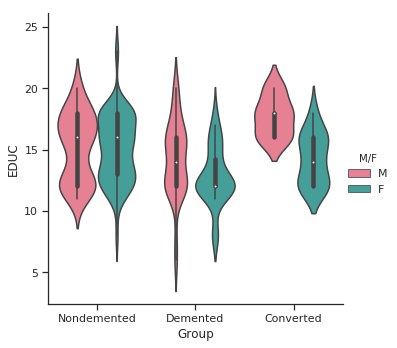

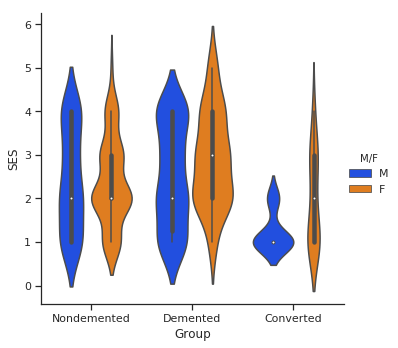

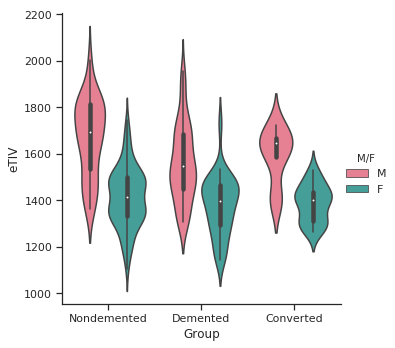

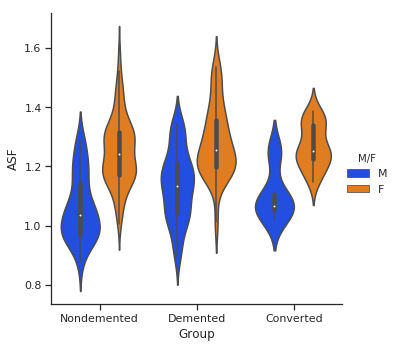

In [36]:
# Realizamos también una serie de gráficos de violin porque nos dan otra visión diferente a los boxplots
# Los realizamos en esta ocasión en todas las visitas para poder comparar.

sns.catplot(x = "Group", y = "EDUC", hue = "M/F", kind = 'violin',data = dflong, palette="husl");
plt.show()
sns.catplot(x = "Group", y = "SES", hue = "M/F", kind = 'violin',data = dflong, palette="bright");
plt.show()
sns.catplot(x = "Group", y = "eTIV", hue = "M/F", kind = 'violin',data = dflong,palette="husl");
plt.show()
sns.catplot(x = "Group", y = "ASF", hue = "M/F", kind = 'violin',data = dflong,palette="bright");
plt.show()

En estos gráficos observamos por ejemplo analizando las variables relacionadas con el volumen intracraneal, que las mujeres tienen menor volumen que los hombres, pero no hay una conexión clara entre ese dato y el diagnóstico de demencia. Se observa también aquí una tendencia a que el volumen intracraneal estimado disminuya en los pacientes que padecen demencia, tanto en los "Demented" como los "Converted"

En cuanto al gráfico superior, vemos una media ligeramente superior en cuanto a su nivel educativo en las personas sanas (Nondemented) que en el resto.

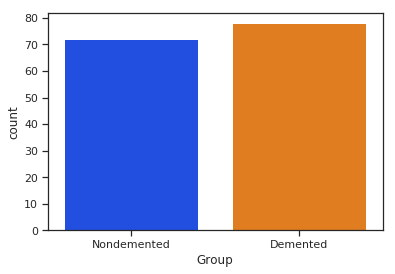

In [37]:
# Vamos a transformar el dataset para poder realizar nuestro análisis de forma más clara aún: 

# Consideramos que los pacientes "converted" tienen la enfermedad, es decir son "demented"
dvisita1['Group'] = dvisita1['Group'].replace(['Converted'], ['Demented']) # Variable objetivo
dflong['Group'] = dflong['Group'].replace(['Converted'], ['Demented'])

# Hay una serie de columnas que no aportan información relevante para nuestro análisis, las eliminamos
# Eliminamos El Id de la resonancia, el número de visitas y Hand (todos los sujetos analizados son diestros)
dvisita1 = dvisita1.drop(['MRI ID', 'Visit', 'Hand'], axis=1) # Drop unnecessary columns
sns.countplot(x='Group', data=dvisita1, palette="bright")


In [38]:
dvisita1.describe()

,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,150.0,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000
mean,0.0,75.446667,14.533333,2.466667,27.56000,0.260000,1474.426667,0.736073,1.206333
std,0.0,7.545421,2.874714,1.103178,2.96847,0.326256,174.683889,0.036458,0.137864
min,0.0,60.000000,6.000000,1.000000,17.00000,0.000000,1123.000000,0.660000,0.883000
25%,0.0,70.000000,12.000000,2.000000,26.00000,0.000000,1347.250000,0.710000,1.121000
50%,0.0,75.000000,14.000000,2.000000,29.00000,0.000000,1453.500000,0.735000,1.207500
75%,0.0,80.000000,16.000000,3.000000,30.00000,0.500000,1565.250000,0.757750,1.302750
max,0.0,96.000000,23.000000,5.000000,30.00000,1.000000,1987.000000,0.837000,1.563000


              M   F
Demented     40  38
Nondemented  22  50


Text(0.5, 1.0, 'Género y enfermos de Alzheimer')

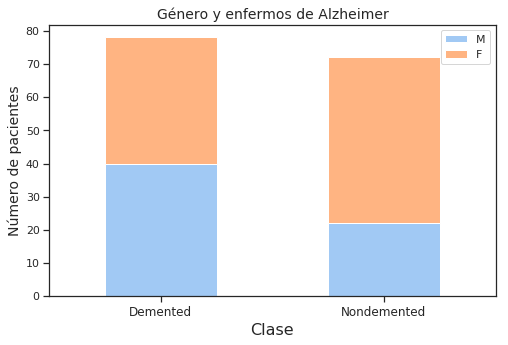

In [39]:
# Definimos una función para realizar un gráfico de barras
def barras(feature):
    Demented = dvisita1[dvisita1['Group']=='Demented'][feature].value_counts()
    Nondemented = dvisita1[dvisita1['Group']=='Nondemented'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented'] 
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
    print(df_bar)
                
                
# Género y clasificación de pacientes( Female=0, Male=1)
barras('M/F')
plt.xlabel('Clase',fontsize=16)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Número de pacientes',fontsize=14)
plt.legend()
plt.title('Género y enfermos de Alzheimer',fontsize=14)

En este dataset longitudinal la proporción de personas diagnosticadas con demencia es similar en hombres y mujeres en la primera visita, entre las personas sanas hay más mujeres, debido también a que hay más mujeres en el dataset. Recordemos que la enfermedad de Alzheimer u otro tipo de demencias suele afectar más a mujeres que a hombres, por motivos diversos (ver documento pdf adjunto)

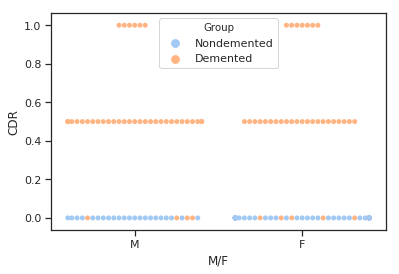

In [40]:
# Dibujamos un gráfico de dispersión (scatterplot o swarmplot en seaborn) para mostrar cada observación del dataset

sns.swarmplot(x="M/F",y="CDR",hue="Group",data=dvisita1)

En este gráfico que relaciona CDR y diagnóstico, podemos ver muy claramente como los pacientes sanos, tanto hombres como mujeres, tienen un CDR de cero, los enfermos uno mayor.

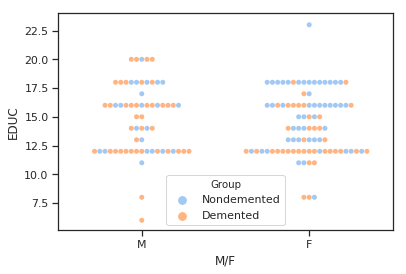

In [41]:
sns.swarmplot(x="M/F",y="EDUC",hue="Group",data=dvisita1)

En este gráfico no hay una relación obvia entre educación y diagnóstico, aunque en el caso de las mujeres si es más claro aquí. Quizas no tengamos un número de observaciones suficientes para generalizar en otros grupos de pacientes.

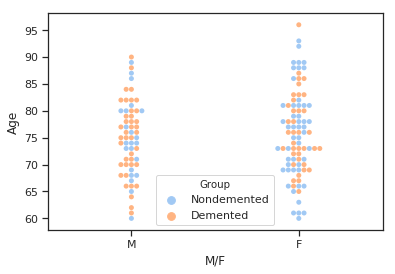

In [42]:
sns.swarmplot(x="M/F",y="Age",hue="Group",data=dvisita1)


Este grafico en el que se pueden apreciar todas las observaciones o sujetos del dataset en su primera visita, indica que hay más proporción de personas con algún tipo de demencia entre los hombres (M) que entre las mujeres (F). (habitualmente es al revés en la población en general, esto puede ser así solamente en esta muestra)


             1.0  2.0  3.0  4.0  5.0
Demented      18   23   18   17    2
Nondemented   15   27   16   13    1


Text(0.5, 1.0, 'Status Socioeconómico y enfermos con demencia')

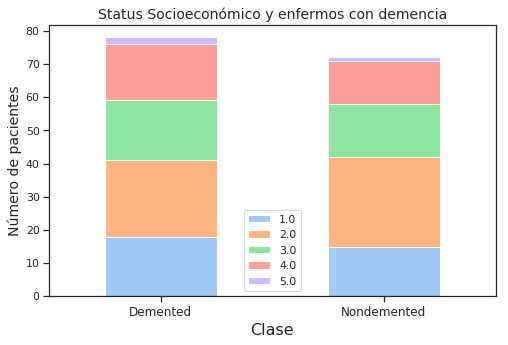

In [43]:
barras('SES')
plt.xlabel('Clase',fontsize=16)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Número de pacientes',fontsize=14)
plt.legend()
plt.title('Status Socioeconómico y enfermos con demencia',fontsize=14)

No encontramos diferencias significativas en este dataset al respecto entre diagnosticados con algún tipo de demencia y personas sanas respecto al status socioeconómico.

              0.0   0.5   1.0
Demented     13.0  52.0  13.0
Nondemented  72.0   NaN   NaN


Text(0.5, 1.0, 'CDR y enfermos con demencia')

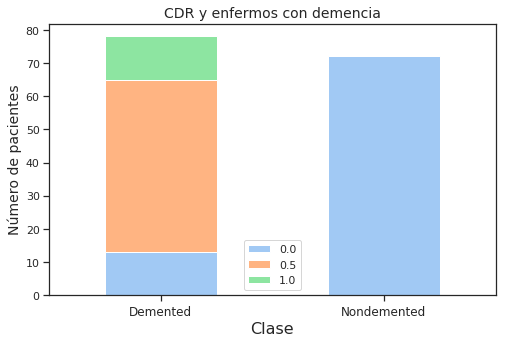

In [44]:
barras('CDR')
plt.xlabel('Clase',fontsize=16)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Número de pacientes',fontsize=14)
plt.legend()
plt.title('CDR y enfermos con demencia',fontsize=14)

Este gráfico evidencia la relación entre CDR y demencia de nuevo.

             17.0  19.0  20.0  21.0  22.0  ...   26.0  27.0  28.0  29.0  30.0
Demented      1.0   2.0   3.0   5.0   2.0  ...    9.0  10.0   4.0  11.0  15.0
Nondemented   NaN   NaN   NaN   NaN   NaN  ...    1.0   1.0  11.0  29.0  30.0

[2 rows x 13 columns]


Text(0.5, 1.0, 'MMSE y enfermos con demencia')

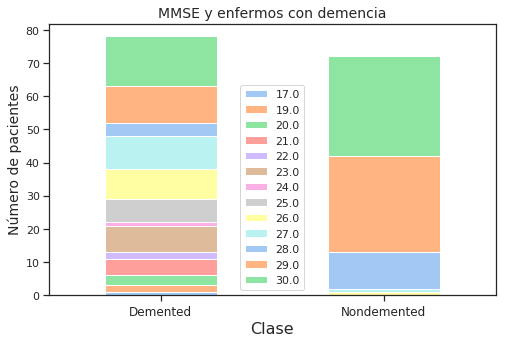

In [45]:
barras('MMSE')
plt.xlabel('Clase',fontsize=16)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Número de pacientes',fontsize=14)
plt.legend()
plt.title('MMSE y enfermos con demencia',fontsize=14)

Hay también una clara relación entre puntuación MMSE (ver documento pdf adjunto) y demencia. En este gráfico vemos como las personas sanas tienen todas puntuaciones mayores de 26, las que padecen demencia tienen muchas puntuaciones menores de esa cifra.

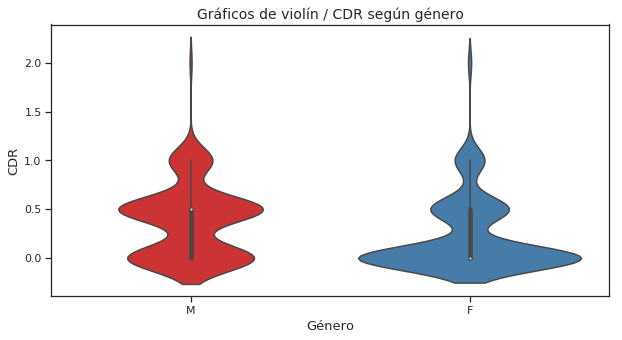

In [46]:
# Analizamos la relación del índice CDR y el género, en este caso en todo el dataset, dflong

plt.figure(figsize=(10,5))
sns.violinplot(x='M/F', y='CDR', data=dflong, palette="Set1")
plt.title('Gráficos de violín / CDR según género',fontsize=14)
plt.xlabel('Género',fontsize=13)
plt.ylabel('CDR',fontsize=13)
plt.show()

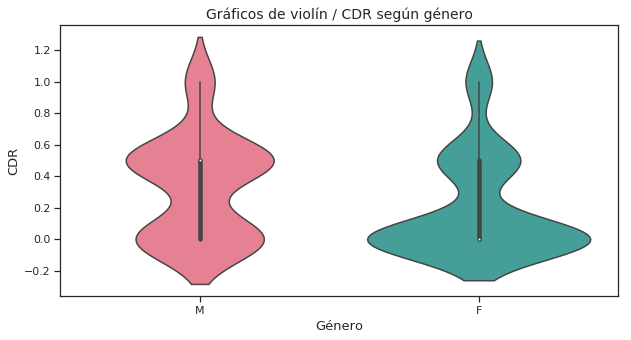

In [47]:
# Comparamos el gráfico anterior con el que considera solamente la primera visita

plt.figure(figsize=(10,5))
sns.violinplot(x='M/F', y='CDR', data=dvisita1, palette="husl")
plt.title('Gráficos de violín / CDR según género',fontsize=14)
plt.xlabel('Género',fontsize=13)
plt.ylabel('CDR',fontsize=13)
plt.show()


Este último gráfico que relaciona CDR con género corresponde solamente a primeras visitas diagnósticas. Se aprecia, comparándolo con el gráfico superior, como tanto la media de CDR como los valores máximos de CDR son menores que en posteriores diagnósticos, lo que revela empeoramiento de la enfermedad para quien tiene algún tipo de demencia.

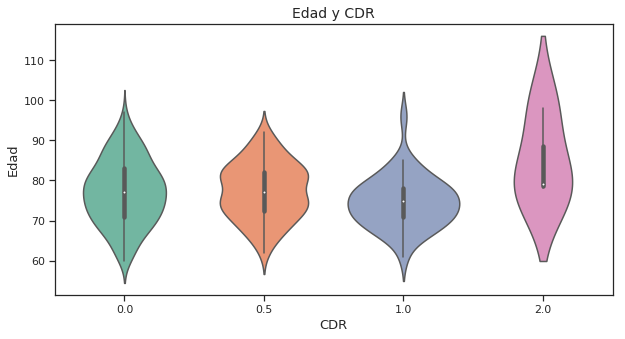

In [48]:
# Analizamos la relación del índice CDR y la edad, en este caso en todo el dataset, dflong
plt.figure(figsize=(10,5))
sns.violinplot(x='CDR', y='Age', data=dflong, palette="Set2")
plt.title('Edad y CDR',fontsize=14)
plt.xlabel('CDR',fontsize=13)
plt.ylabel('Edad',fontsize=13)
plt.show()

El gráfico infiere  claramente el aumento del CDR, es decir del grado de demencia a medida que aumenta la edad. Tanto de la media como de valores máximos y nínimos. La media en este dataset está tanto para enfermos como para sanos por encima de 70 años. sube casí hasta los 80 entre los diagnosticados más severos (grado 2)

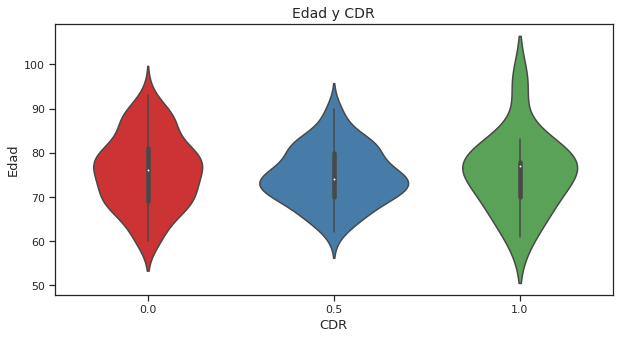

In [49]:
# Comparamos el gráfico anterior con el que considera solamente la primera visita, dfinal
plt.figure(figsize=(10,5))
sns.violinplot(x='CDR', y='Age', data=dvisita1, palette="Set1")
plt.title('Edad y CDR',fontsize=14)
plt.xlabel('CDR',fontsize=13)
plt.ylabel('Edad',fontsize=13)
plt.show()

En el caso de primeras visitas diagnosticas la situación es similar, la diferencia es que no nos encontramos pacientes con grado CDR 2.

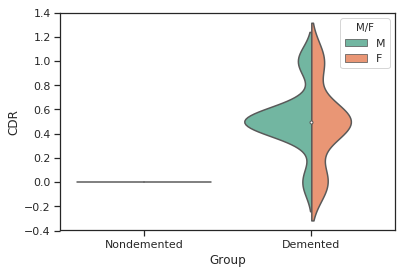

In [50]:
ax = sns.violinplot(x="Group", y="CDR", hue="M/F",
...                     data=dvisita1, palette="Set2", split=True)

Otra muestra de puntación 0 en CDR para personas sanas. Y de mayor cantidad de enfermos varones en este dataset.

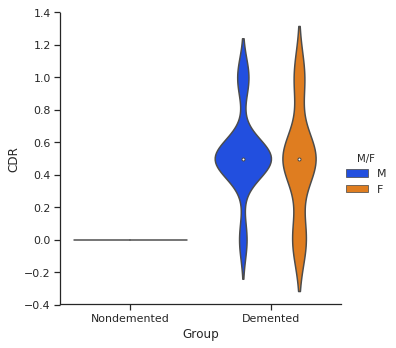

In [51]:
sns.catplot(x = "Group", y = "CDR", hue = "M/F", kind = 'violin',data = dvisita1, palette="bright");
plt.show()

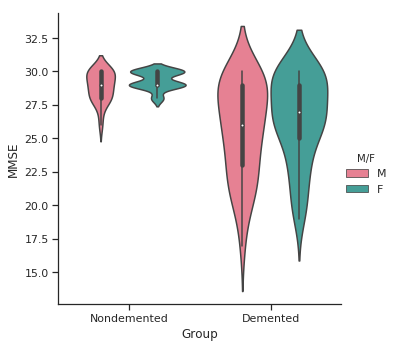

In [52]:
sns.catplot(x = "Group", y = "MMSE", hue = "M/F", kind = 'violin',data = dvisita1, palette="husl");
plt.show()

En este gráfico se ve claramente como el puntaje MMSE es muy superior en ambos sexos entre las personas sanas.

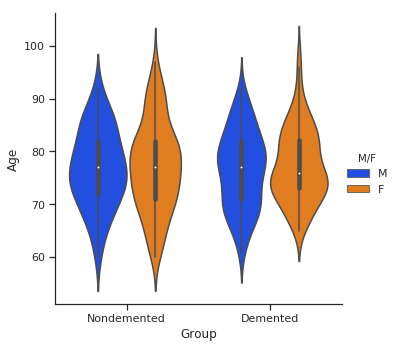

In [53]:
sns.catplot(x = "Group", y = "Age", hue = "M/F", kind = 'violin',data = dflong, palette="bright");
plt.show()

No encontramos diferencias significativas entre el diagnostico y la edad.

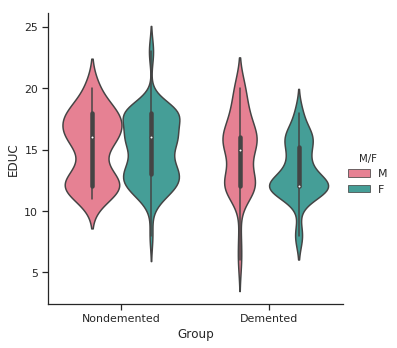

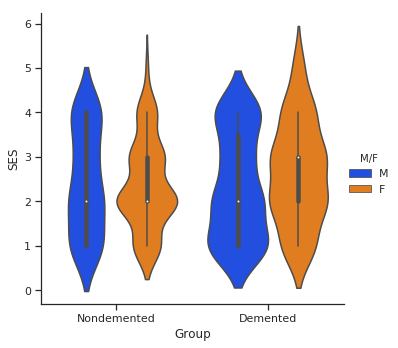

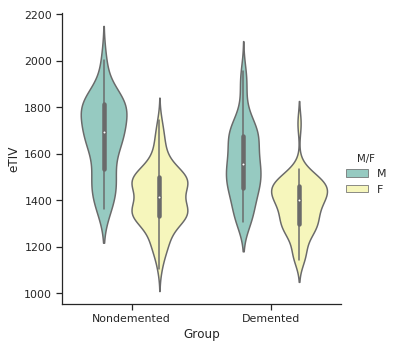

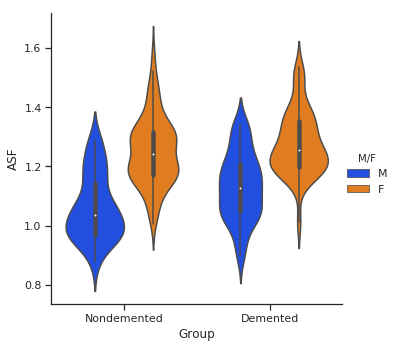

In [54]:
sns.catplot(x = "Group", y = "EDUC", hue = "M/F", kind = 'violin',data = dflong,palette="husl");
plt.show()
sns.catplot(x = "Group", y = "SES", hue = "M/F", kind = 'violin',data = dflong, palette="bright");
plt.show()
sns.catplot(x = "Group", y = "eTIV", hue = "M/F", kind = 'violin',data = dflong, palette="Set3");
plt.show()
sns.catplot(x = "Group", y = "ASF", hue = "M/F", kind = 'violin',data = dflong,palette="bright");
plt.show()

Los gráficos continúan señalando lo visto anteriormente, las personas sanas tienen una media de años en el sistema educativo mayor y un volumen intracraneal estimado mayor también. No parecen tan clara la relación con la situación socioeconomica, aunque entre las mujeres enfermas hay más personas con nivel SES alto.

(15.3, 30.0)

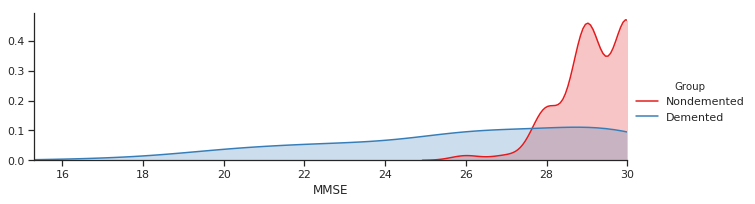

In [55]:
# MMSE : Mini Mental State Examination
# Vemos como los Nondemented tienen resultados con mayor puntuacíón en el test, de 25 a 30. 
# Min 17 ,MAX 30
facet= sns.FacetGrid(dvisita1,hue="Group", aspect=3, palette="Set1")
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, dflong['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

El gráfico muestra como el grupo de personas no afectado por la enfermedad tiene una puntuación en el test MMSE claramente más alta que los enfermos con algún tipo de demencia.

In [56]:
# Encontramos los outliers en cada variable

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

list_atributes = ['MR Delay','EDUC', "SES", "MMSE", 'eTIV', "nWBV", "ASF"]
print("Outliers: \n")
for item in list_atributes:
    print(item,': ',outliers_iqr(dflong[item]))

Outliers: 

MR Delay :  (array([ 32,  71,  75, 153, 159, 160, 265, 369]),)
EDUC :  (array([107, 108, 109]),)
SES :  (array([136, 137, 138, 161, 162, 179, 180]),)
MMSE :  (array([  4,  25,  26,  43,  44,  51,  52,  60,  88,  89,  90,  93,  94,
        97,  98,  99, 100, 101, 105, 106, 138, 162, 172, 173, 184, 185,
       186, 222, 225, 226, 231, 232, 234, 251, 299, 300, 316, 317, 328,
       332, 360, 366]),)
eTIV :  (array([0, 1]),)
nWBV :  (array([], dtype=int64),)
ASF :  (array([282]),)


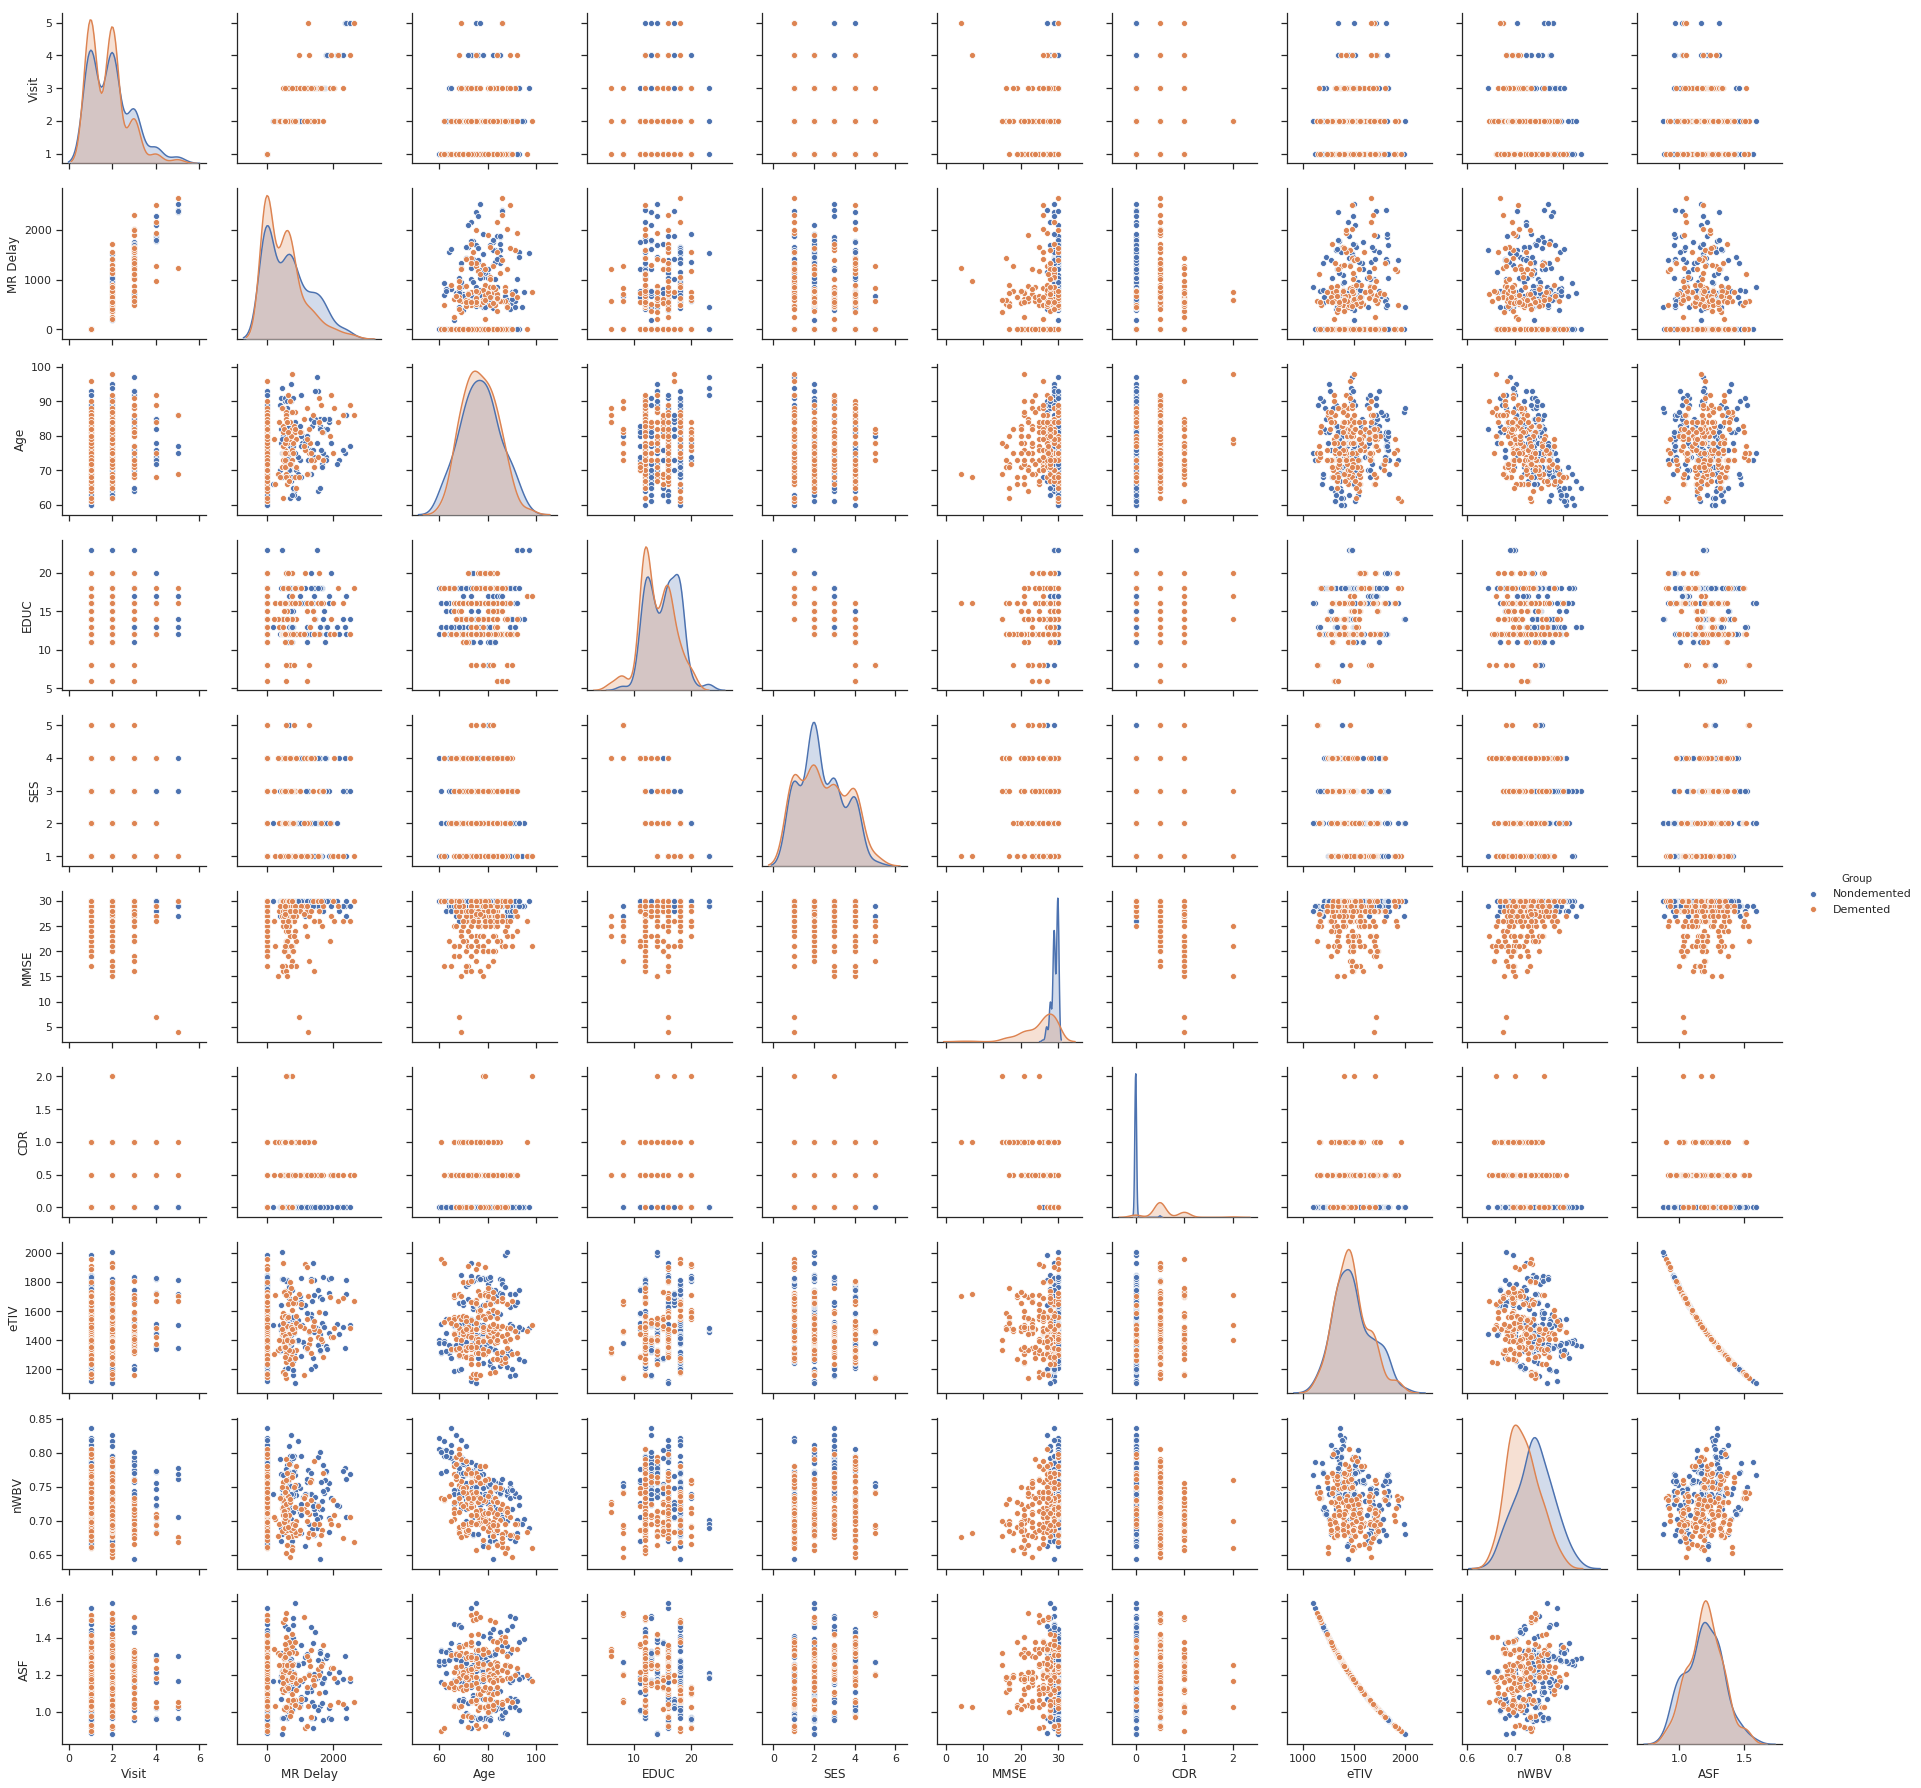

In [57]:

# Relacionamos gráficamente todas las variables entre sí para ver si hay algo significativo
# Lo vemos con mayor exactitud numérica más adelante con la matriz de correlación
sns.set(style="ticks")

sns.pairplot(dflong, hue="Group")
plt.show()

In [58]:
# Convertimos las variables categóricas del dataset en numéricas para analizar la correlación entre ellas
# En primer lugar convertimos La categoria "Demented" o enfermos de demencia a 1, los no enfermos a 0.
group_map = {"Demented": 1, "Nondemented": 0}
#Aplicamos los cambios con map y replace
dflong['Group'] = dflong['Group'].map(group_map)
#Convertimos la variable categórica que nos indica el género a numérica también.
# Damos por ejemplo el valor 0 a mujeres y el 1 a hombres
dflong['M/F'] = dflong['M/F'].replace(['F','M'], [0,1])

In [59]:
# Una vez hecho esto, creamos una función que nos dibuje la matriz de correlación entre variables

def matriz_correlacion( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 140 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

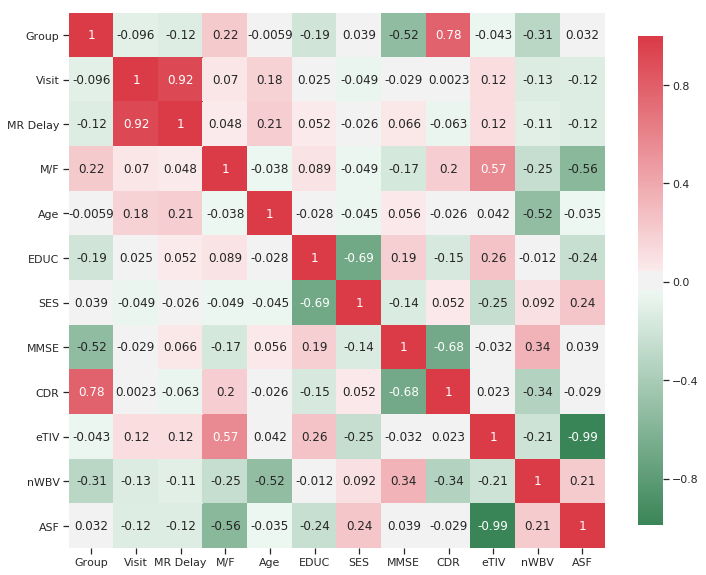

In [60]:
# Calculamos y visualizamos la matriz de correlación del dataset longitudinal
matriz_correlacion(dflong)


En la matriz de correlación apreciamos varias variables que están correladas. La más relación más evidente es la de ASF con eTIV, tienen una relación prácticamente lineal y negativa, esto es sabido ya que el Factor de escalado de atlas (ASF) es un enfoque unificado para el análisis de datos morfométricos y funcionales en adultos jóvenes, viejos y dementes que utiliza la normalización automatizada del tamaño de la cabeza (eTIV) basada en atlas.

Por eso el volumen intracraneal total (eTIV) se correlaciona con el determinante de la matriz de transformación utilizada para alinear una imagen con un atlas. 

Se observa también una correlación negativa entre la variable binaria Group, es decir la que indica si hay demencia o no y MMSE, y otra correlación positiva más significativa aún (0.78) entre Group y CDR,lo cual es totalmente lógico, a más puntuación de CDR, indica que la propabilidad de padecer algún tipo de demencia aumenta.

También existe una correlación significativa e inversamente proporcional (negativa) entre MMSE y CDR. A mejores resultados del examen de estado mental MMSE, es decir a más puntuación de MMSE, menor puntuación en CDR, ya que CDR=0 indica demencia grave. Estas 2 variables y su correlación con el diagnóstico 'Group' son las que más nos interesa en relación con la posible predicción de la demencia.

Hay otras variables con correlación alta, como SES y EDUC, es decir, a mayor status socieconómico se encuentra mayor nivel educativo, o las variables MR Delay y Visit, que en este caso indica que al haber hecho más visitas el paciente recibió mayores dosis de contraste para efectuar la resonancia magnética, pero no influyen en la situación de enfermo o no enfermo con demencia de cada paciente.



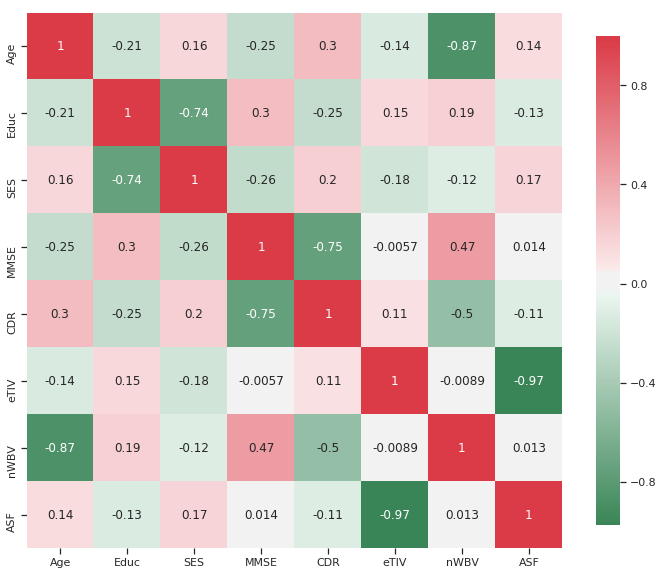

In [61]:
# Calculamos y visualizamos la matriz de correlación del dataset de resonancias de sección transversal (dfcross)
# Esta matriz la hemos calculado anteriormente también pero la volvemos a hacer para comparar muestras.
# En este caso dataset no disponemos de una variable como Group que nos indique el diagnóstico de padecer o no demencia
# Es interesante conocer la relación entre las variables ya que este dataset analiza sujetos diferentes
matriz_correlacion(dfcross)


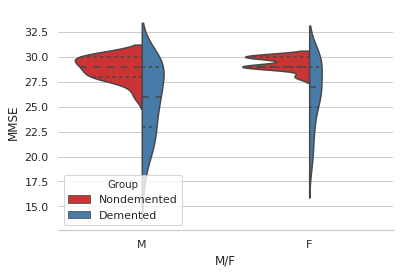

In [62]:
sns.set(style="whitegrid", palette="Set1", color_codes=True)

# En este gráfico de violin divimos el dataset por género y análizamos el MMSE de los no dementes (0) y los enfermos (1)
sns.violinplot(x="M/F", y="MMSE", hue="Group",
               split=True, inner="quart",data = dvisita1)
sns.despine(left=True)

El gráfico nos muestra tanto como para hombres como para mujeres como las personas sin demencia (en rojo) tienen un MMSE siempre mayor que 25, mientras que para las personas con algún tipo de demencia (ya sea, leve, moderada o grave), hay una mayor variabilidad en la puntuación MMSE o Mini Mental Examination. Hay más variabilidad en el caso de los hombres que en las mujeres en este dataset, lo cual no quiere decir que sea algo generalizable para toda la población.

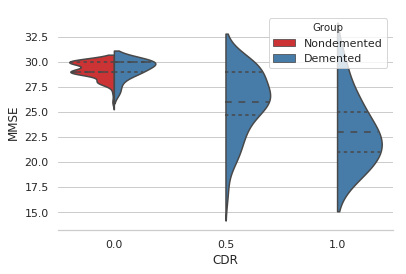

In [63]:
# Vamos a hacer lo mismo pero con la variable CDR

sns.violinplot(x="CDR", y="MMSE", hue="Group",
               split=True, inner="quart",data = dvisita1)
sns.despine(left=True)

En el gráfico superior podemos observar que las personas no enfermas tienen todas una alta puntuación en el Examen MMSE, por encima de 27 mínimo, mientras que en las personas diagnosticadas con la enfermedad hay gran variabilidad, y muchos valores están por debajo de esa cifra, coincidiendo que la mayoría tienen 0.5 y 1 de CDR, aunque algunos pocos tengan 0 CDR también. Este último dato es importante, porque en este último dataset por primera vez vemos como hay personas con 0 CDR que están diagnosticadas con demencia, algo que no podíamos inferir en el anterior dataset, en el que interpretábamos que si el CDR es 0 la persona está sana. El rating CDR se calcula a partir del análisis de los diferentes comportamientos del paciente relacionados con memoria, orientación, resolución de problemas y juicio, asuntos comunitarios, hogar, pasatiempos, y cuidado personal, y esa estimación no siempre es exacta.

(0.6, 0.9)

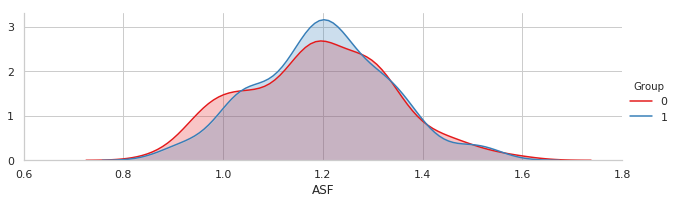

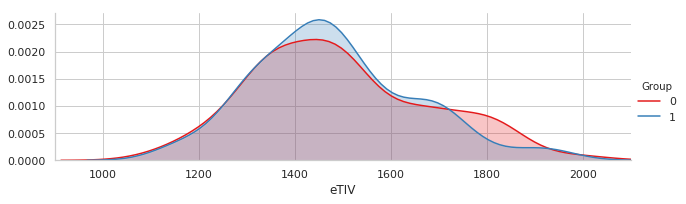

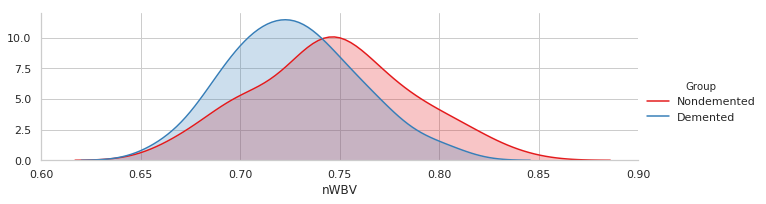

In [64]:
#bar_chart('ASF') = Atlas Scaling Factor
facet= sns.FacetGrid(dflong,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, dvisita1['ASF'].max()))
facet.add_legend()
plt.xlim(0.6, 1.8)

#eTIV = Estimated Total Intracranial Volume
facet= sns.FacetGrid(dflong,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, dvisita1['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)

#'nWBV' = Normalized Whole Brain Volume
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(dvisita1,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, dflong['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

Las gráficas indican que el grupo no dignosticado con demencia (0) tiene una ligera mayor proporción de volumen cerebral que el grupo demente (1). Se supone que esto se debe a que las enfermedades afectan al cerebro al estar encogiendo su tejido. Las columnas eTIV, nWBV y ASF son las que miden el tamaño estimado y volumen del cerebro. Las mujeres tienen un tamaños/volumen menor que los hombres pero no es un factor que incida claramente en el diagnóstico.

**4. Selección de variables, elección, construcción y optimización de algún modelo de Machine Learning Supervisado (dataset longitudinal)**

In [65]:
# Vamos a comenzar a elaborar los modelos predictivos a través de diferentes algoritmos
# Utilizamos Prepocessing de Sci Kit Learn 
# En primer lugar vamos a codificar y etiquetar correctamente las columnas con la función LabelEncoder
# Basaremos los modelos en los datos de la primera visita ya que queremos prevenir posibles sesgos de repetición
# Si nos basamos en los datos de la primera visita no estaremos analizando varias veces los mismos pacientes, aunque
# es posible que con los datos totales pudieramos tener buenos resultados también. Calcularemos ambos casos.

from sklearn.preprocessing import LabelEncoder
for column in dvisita1.columns:
    le = LabelEncoder()
    dvisita1[column] = le.fit_transform(dvisita1[column])

In [66]:
# Definimos las variables predictoras eliminando las más correladas y las variables objetivo (Group)
from sklearn.model_selection import train_test_split

# Selecionamos las variables predictoras adecuadas para que no exista multicolinealidad en los modelos.
# En la matriz de correlación observamos que CDR y MMSE son las más correlacionadas con Group
# MMSE y CDR también tienen correlación entre sí; elegiremos sólo una de ellas para evitar colinealidad
# Probamos con varios conjuntos diferentes de variables predictoras, uno incluye CDR y el otro MMSE en su lugar
# Se han probado las siguientes características y tras ver los resultados se ha seleccionado CDR como predictora:

feature_col_names = ["M/F", "Age", "EDUC", "SES", "CDR", "eTIV", "nWBV", "ASF"]
# feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
# feature_col_names = ["M/F", "Age", "EDUC", "SES","CDR", "eTIV", "nWBV"]
# feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV"]

# Elegimos la variable objetivo para la clasificación
predicted_class_names = ['Group']

#Llamaremos al conjunto de variables predictoras X, y a la variable a predecir, y
X = dvisita1[feature_col_names].values
y = dvisita1[predicted_class_names].values

# Para analizar el dataset con todas las visitas activamos estas X e y, y desactivamos como comentarios las anteriores
# En el caso del dataset dflong todas las columnas ya las convertimos anteriormente a numéricas.
#X = dflong[feature_col_names].values
#y = dflong[predicted_class_names].values


#Definimos las muestras de entrenamiento y test, dividiendolas en la proporción 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

[0.02727329 0.08134207 0.07003212 0.04318353 0.53214858 0.08386766
 0.08999411 0.07215864]


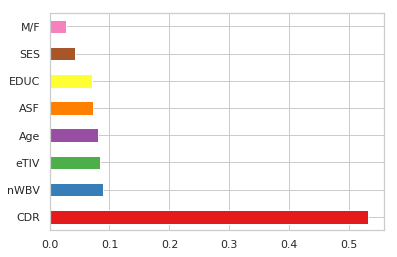

In [67]:
# Analizamos importancia que cada variable tiene respecto a la variable objetivo en un modelo ExtraTreesclassifier:

import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
modelo = ExtraTreesClassifier()
modelo.fit(X,y)
print(modelo.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(modelo.feature_importances_, index=feature_col_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

La influencia que la variable CDR tiene en el resultado del modelo (en este caso ExtraTreesClassifier) es evidente.

In [68]:
# Definimos las métricas y las leyendas gráficas de la matriz de confusión de cada modelo

from sklearn import metrics
def matriz_confusion(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Nondemented','Demented']
    plt.title('Matriz de confusión')
    plt.ylabel('Valor real')
    plt.xlabel('Predicción')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    #s = [['TN','FP'], ['FN', 'TP']]
    s = [['- reales','Falsos +'], ['Falsos -', '+ reales']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [69]:
# Definimos una función para crear un informe predictivo, que nos ofrezca la matriz de confusion y curva ROC

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
def informe_predictivo(model):

    model_test = model.predict(X_test)

    print("\n\nMatriz de confusión:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nInforme de Clasificación: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    matriz_confusion(y_test, model_test)

total_fpr = {}
total_tpr = {}
def curva_roc(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)
    total_fpr[str((str(model).split('(')[0]))] = fpr
    total_tpr[str((str(model).split('(')[0]))] = tpr
    plt.figure()
    plt.plot(fpr, tpr, color='green', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de positivos reales')
    plt.title('ROC: Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()



Matriz de confusión:
[[14  5]
 [ 1 25]]


Informe de Clasificación: 
              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.83      0.96      0.89        26

    accuracy                           0.87        45
   macro avg       0.88      0.85      0.86        45
weighted avg       0.88      0.87      0.86        45



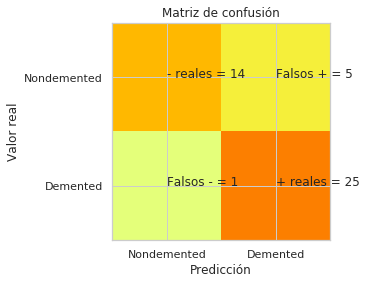

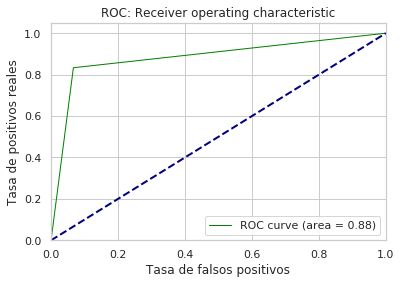


Exactitud del modelo:  0.8666666666666667 




In [70]:
# Definimos la exactitud (accuracy) del modelo con una función 
total_accuracy = {}
def exactitud(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nExactitud del modelo: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu
    
# Importamos los algoritmos de sklearn de los diferentes modelos que vamos a aplicar y analizar

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Aplicamos en primer lugar el algoritmo predictivo XGBOOST

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [1,2,3,4,5]
        }

xgboost = XGBClassifier(random_state=0)
xgboost.fit(X_train, y_train.ravel())
informe_predictivo(xgboost) 
curva_roc(xgboost)
exactitud(xgboost)



Matriz de confusión:
[[14  5]
 [ 1 25]]


Informe de Clasificación: 
              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.83      0.96      0.89        26

    accuracy                           0.87        45
   macro avg       0.88      0.85      0.86        45
weighted avg       0.88      0.87      0.86        45



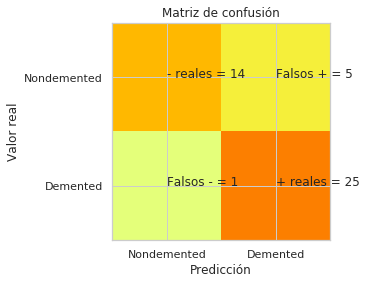

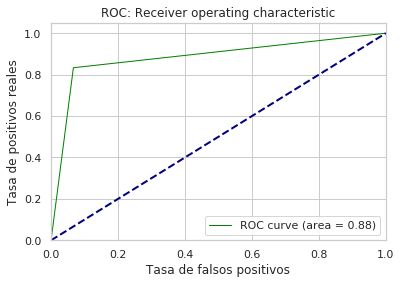


Exactitud del modelo:  0.8666666666666667 




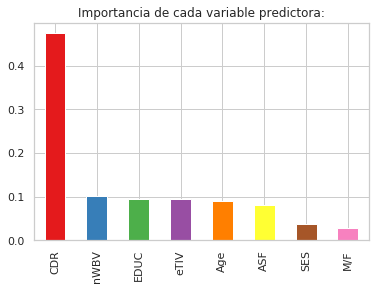

In [71]:
# Continuamos aplicando el modelo Random Forest
# Aplicamos el criterio Gini, una profundidad máxima de cada árbol de 9,y un número de 270 árboles

rfc=RandomForestClassifier(criterion='gini',max_depth=9,max_features='auto',n_estimators=270)

param_grid = { 
    'n_estimators': [270],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8,9],
    'criterion' :['gini']
}

#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring = 'roc_auc')
rfc.fit(X_train, y_train.ravel())
#print("Mejores parametros encontrados:")
#print(rfc.best_params_)
informe_predictivo(rfc) 
curva_roc(rfc)
exactitud(rfc)

# Representamos en un gráfico la importancia que tiene cada variable predictora en el modelo
feat_importances = pd.Series(rfc.feature_importances_, index=feature_col_names)
feat_importances.nlargest(8).plot(kind='bar')
plt.title("Importancia de cada variable predictora:")
plt.show()




Matriz de confusión:
[[14  5]
 [ 0 26]]


Informe de Clasificación: 
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       0.84      1.00      0.91        26

    accuracy                           0.89        45
   macro avg       0.92      0.87      0.88        45
weighted avg       0.91      0.89      0.89        45



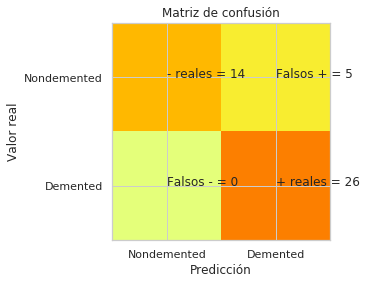

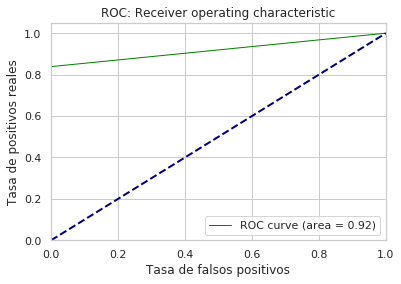


Exactitud del modelo:  0.8888888888888888 




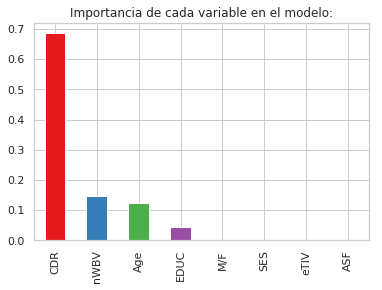

In [72]:
# Aplicamos un modelo basado en Árbol de decisión

arboldec = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
arboldec.fit(X_train, y_train.ravel())
informe_predictivo(arboldec) 
curva_roc(arboldec)
exactitud(arboldec)
#importances = clf.feature_importances_


feat_importances = pd.Series(arboldec.feature_importances_, index=feature_col_names)
feat_importances.nlargest(8).plot(kind='bar')
plt.title("Importancia de cada variable en el modelo:")
plt.show()



Matriz de confusión:
[[14  5]
 [ 0 26]]


Informe de Clasificación: 
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       0.84      1.00      0.91        26

    accuracy                           0.89        45
   macro avg       0.92      0.87      0.88        45
weighted avg       0.91      0.89      0.89        45



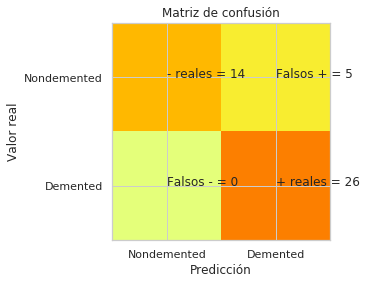

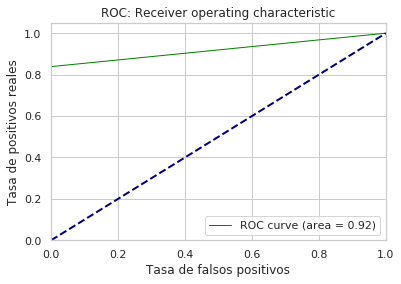


Exactitud del modelo:  0.8888888888888888 




In [73]:
# Continuamos con un modelo SVM

svm = SVC(kernel="linear", C=0.1,random_state=0)
svm.fit(X_train, y_train.ravel())
informe_predictivo(svm) 
curva_roc(svm)
exactitud(svm)



Matriz de confusión:
[[14  5]
 [ 1 25]]


Informe de Clasificación: 
              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.83      0.96      0.89        26

    accuracy                           0.87        45
   macro avg       0.88      0.85      0.86        45
weighted avg       0.88      0.87      0.86        45



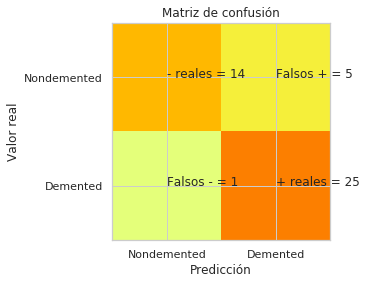

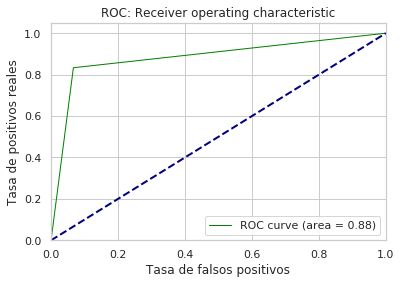


Exactitud del modelo:  0.8666666666666667 




Matriz de confusión:
[[14  5]
 [ 1 25]]


Informe de Clasificación: 
              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.83      0.96      0.89        26

    accuracy                           0.87        45
   macro avg       0.88      0.85      0.86        45
weighted avg       0.88      0.87      0.86        45



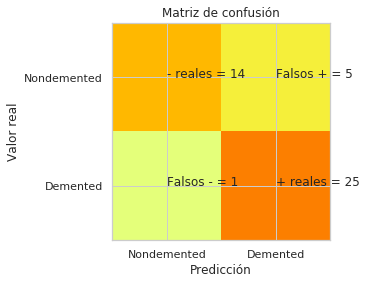

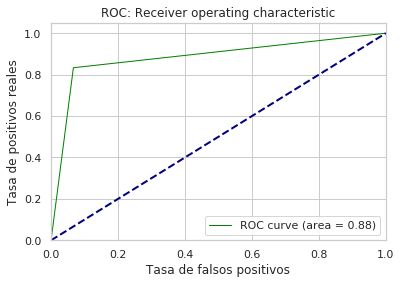


Exactitud del modelo:  0.8666666666666667 




In [74]:
# Vamos a aplicar también el algoritmo Voting Class, para lo cual importamos varias librerías previamente

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection

vote_est = [('etc',ensemble.ExtraTreesClassifier()),
            ('gb',GradientBoostingClassifier()),
            ('abc',AdaBoostClassifier()),
    ('rfc', ensemble.RandomForestClassifier(criterion='gini', max_depth=8, max_features='auto', n_estimators=200)),
    #('svc', svm.SVC(probability=True)),
    #('xgb', XGBClassifier()),
            ('lbgm',LGBMClassifier())
           ]


vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, X_train, y_train.ravel())
vote_hard.fit(X_train, y_train.ravel())
informe_predictivo(vote_hard) 
curva_roc(vote_hard)
exactitud(vote_hard)
#pred = vote_hard.predict(X_test)
#accu = metrics.accuracy_score(y_test,pred)
#print("\nAcuuracy Of the Model: ",accu,"\n\n")

vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, X_train, y_train.ravel())
vote_soft.fit(X_train, y_train.ravel())
informe_predictivo(vote_soft) 
curva_roc(vote_soft)
exactitud(vote_soft)
#pred = vote_soft.predict(X_test)
#accu = metrics.accuracy_score(y_test,pred)
#print("\nAcuuracy Of the Model: ",accu,"\n\n")

ExtraTreesClassifier : 


Matriz de confusión:
[[14  5]
 [ 3 23]]


Informe de Clasificación: 
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        19
           1       0.82      0.88      0.85        26

    accuracy                           0.82        45
   macro avg       0.82      0.81      0.81        45
weighted avg       0.82      0.82      0.82        45



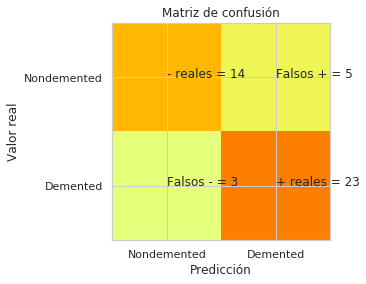

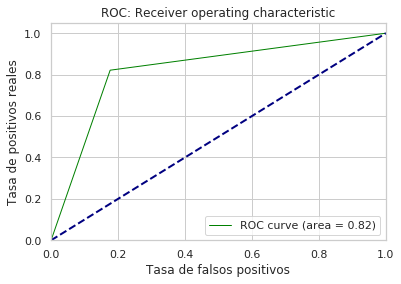


Exactitud del modelo:  0.8222222222222222 


GradientBoostingClassifier : 


Matriz de confusión:
[[14  5]
 [ 1 25]]


Informe de Clasificación: 
              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.83      0.96      0.89        26

    accuracy                           0.87        45
   macro avg       0.88      0.85      0.86        45
weighted avg       0.88      0.87      0.86        45



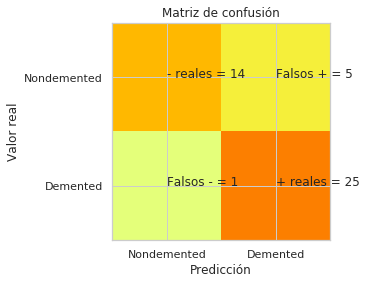

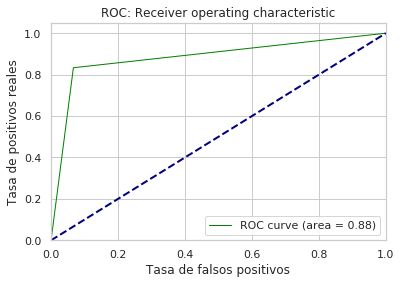


Exactitud del modelo:  0.8666666666666667 


AdaBoostClassifier : 


Matriz de confusión:
[[14  5]
 [ 2 24]]


Informe de Clasificación: 
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.83      0.92      0.87        26

    accuracy                           0.84        45
   macro avg       0.85      0.83      0.84        45
weighted avg       0.85      0.84      0.84        45



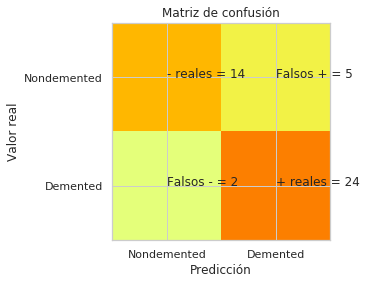

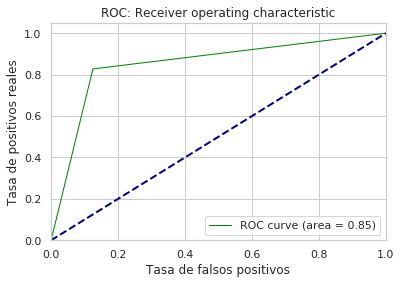


Exactitud del modelo:  0.8444444444444444 


LogisticRegression : 


Matriz de confusión:
[[14  5]
 [ 0 26]]


Informe de Clasificación: 
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       0.84      1.00      0.91        26

    accuracy                           0.89        45
   macro avg       0.92      0.87      0.88        45
weighted avg       0.91      0.89      0.89        45



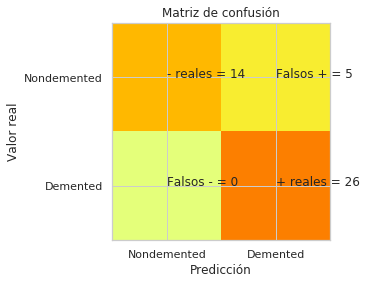

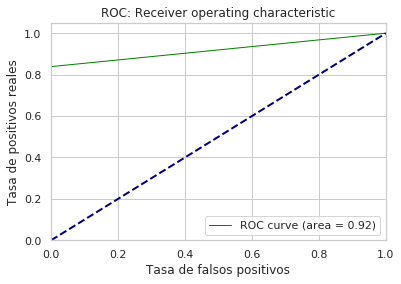


Exactitud del modelo:  0.8888888888888888 




In [75]:
# Otros algoritmos de clasificación 
otros =[ExtraTreesClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),LogisticRegression()]

for model in otros:
    print(str(model).split('(')[0],": ")
    model.fit(X_train,y_train.ravel())
    X = pd.DataFrame(X_train)
    informe_predictivo(model)
    curva_roc(model)
    exactitud(model)

**5.     Evaluación y comparación de modelos - Informe final incluyendo visualización de resultados (dataset longitudinal)**


{'XGBClassifier': 0.8666666666666667, 'RandomForestClassifier': 0.8666666666666667, 'DecisionTreeClassifier': 0.8888888888888888, 'SVC': 0.8888888888888888, 'VotingClassifier': 0.8666666666666667, 'ExtraTreesClassifier': 0.8222222222222222, 'GradientBoostingClassifier': 0.8666666666666667, 'AdaBoostClassifier': 0.8444444444444444, 'LogisticRegression': 0.8888888888888888}


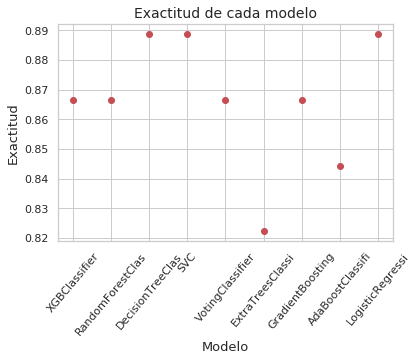

In [76]:
# A continuación comparamos todos los modelos aplicados y sus resultados

data = total_accuracy.values()
labels = total_accuracy.keys()

plt.plot([i for i, e in enumerate(data)], data, 'ro'); plt.xticks([i for i, e in enumerate(labels)], [l[0:16] for l in labels])
plt.title("Exactitud de cada modelo",fontsize = 14)
plt.xlabel('Modelo',fontsize = 13)
plt.xticks(rotation = 50)
plt.ylabel('Exactitud',fontsize = 13)
print (total_accuracy)

Las cifras y el gráfico superior e inferior corresponden al resultado de los modelos aplicados al dataset que contabiliza solamente la primera visita de cada paciente.

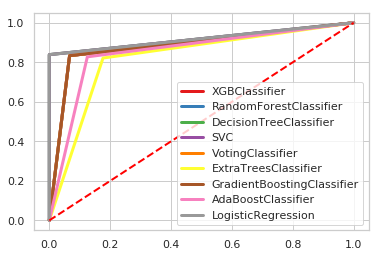

In [77]:
# Comparamos también las curvas ROC y las AUC (Area Under de Curve) de todos los modelos implementados

for i in total_fpr.keys():
    plt.plot(total_fpr[i],total_tpr[i],lw=3, label=i)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend()

En ambas gráficas podemos comprobar como los modelos con más exactitud de los aplicados analizando solo la primera visita de cada paciente son Decision Tree, SVC y Logistic Regression, los tres con una exactitud de 0,88 sobre 1. El VotingClassifier es un ensemble, es decir, va seleccionando los resultados de varios modelos y en ocasiones pueden coincidir sus resultados con alguno de ellos. De ahí que varias curvas ROC se solapen en ese gráfico, varios resultados coinciden en los modelos.

**5. b ) Optimización del modelo basado en Random Forest a través de Cross Validation (dataset longitudinal)**

In [78]:
# Vamos a aplicar cross validation al modelo de Random forest para afinar su exactitud al máximo y optimizarlo

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score

# Feature scaling
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Iniciamos lal validación cruzada
kfolds=8 # Establecemos 8 iteraciones o folds
best_score=0
acc = [] # En esta lista almacenaremos todas las métricas de rendimiento

for M in range(100, 500, 2): # Iteramos probando con M árboles entre 100 y 500
    for d in range(1, 9): # Maximo número de características en cada split
        for m in range(1, 9): # profundidad máxima de cada árbol
            # Entrenamos el modelo
            # n_jobs(4) es el número de computación paralela
            forestModel = RandomForestClassifier(criterion='gini',n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=0)
            
scores = cross_val_score(forestModel, X_train_scaled, y_train, cv=kfolds, scoring='accuracy')

# Calculamos la exactitud media de la cross validation
score = np.mean(scores)

# Si mejoramos el score, almacenamos solamente la mejor puntuación obtenida 
if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m

# Construimos el modelo combinando los sets de validación y entrenamiento       
SelectedRFModel = RandomForestClassifier(criterion='gini',n_estimators=M, max_features=d,
                                          max_depth=m, random_state=0).fit(X_train_scaled, y_train )

PredictedOutput = SelectedRFModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, y_test)
test_recall = recall_score(y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("La mejor exactitud en el set de validacion es:", best_score)
print("Los mejores parámetros de M, d, m son: ", best_M, best_d, best_m)
print("El test de exactitud con los mejores parámetros es:", test_score)
print("Test recall con los mejores parámetros es:", test_recall)
print("Test AUC con los mejores parámetros es (Area bajo curva ROC):", test_auc)

m = 'Random Forest'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

La mejor exactitud en el set de validacion es: 0.9146062271062271
Los mejores parámetros de M, d, m son:  498 8 8
El test de exactitud con los mejores parámetros es: 0.8888888888888888
Test recall con los mejores parámetros es: 1.0
Test AUC con los mejores parámetros es (Area bajo curva ROC): 0.868421052631579


Random Forest es un método de aprendizaje automático versátil capaz de realizar tareas de regresión y clasificación. También adopta métodos de reducción dimensional, trata valores perdidos, valores atípicos y otros pasos esenciales de la exploración de datos. Es un tipo de método de aprendizaje conjunto, donde un grupo de modelos débiles se combinan para formar un modelo poderoso.

Aplicando ahora el modelo Random Forest a los datos de la primera visita diagnóstica, **seleccionando como variable predictora CDR y eliminando MMSE para que no hubiera multicolinealidad******, sin la validación cruzada obteníamos una exactitud y una AUC de 0.87 y 0.88 respectiamente. **Efectuando cross validation obtenemos una exactitud de 0.91** y una AUC de 0.86. La exactitud mejora sensiblemente aún siendo cifras muy similares en ambos casos, lo cual es una muestra de que sin aplicar cross validation no estabamos causando overfitting en el modelo.

**5 c) Aplicamos también los mismos modelos a todo el dataset longitudinal y los resultados son los siguientes:**

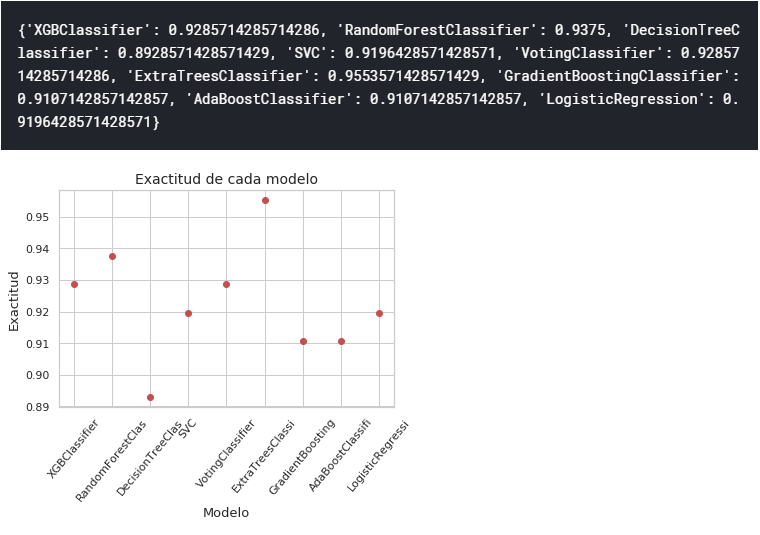

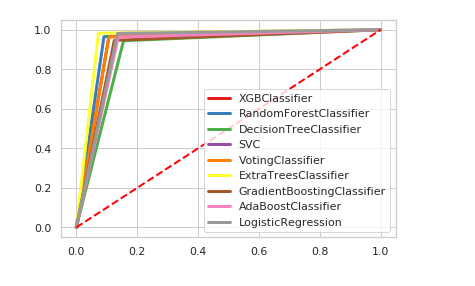

En ambas gráficas podemos comprobar como **los modelos con más exactitud aplicados a todo el dataset, con todas las visitas**, no solo a los datos de la primeras visitas diagnósticas, son ExtratreesClassifier y Random Forest. Como comentamos anteriormente, el VotingClassifier es un ensemble, es decir, va seleccionando los resultados de varios modelos y en ocasiones pueden coincidir sus resultados con alguno de ellos.

**Obtenemos el mejor resultado de todos los datasets y modelos analizados, obteniendo una exactitud de 0,95 con ExtratreesClasifier e incluyendo la variable CDR**, no MMSE. El resto de los modelos en este caso también ofrecen una exactitud muy buena como se puede ver en los gráficos y cifras resumen.

Si aplicamos cross validation al modelo Random Forest aplicado a todo el dataset el resultado es el siguiente:

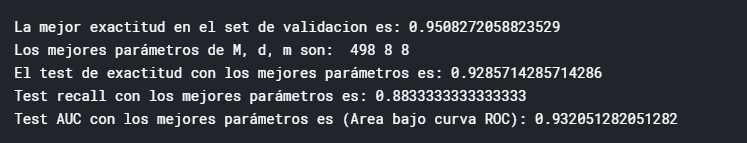

Aplicando el modelo Random Forest, seleccionando como variable predictora CDR y eliminando MMSE para que no hubiera multicolinealidad, sin la validación cruzada obteníamos una exactitud y una AUC de 0.94. **Efectuando cross validation obtenemos una exactitud de 0.95 y una AUC de 0.93**. La exactitud mejora ligeramente también y parece que sin aplicar cross validation tampoco estabamos causando overfitting en el modelo. Como vemos el resultado es mejor que aplicando los modelos solo al dataset de las primeras visitas al poder buscar patrones en un mayor número de datos.

**- Resultados seleccionando MMSE como variable predictora en lugar de CDR:
**
Dependiendo de los datos de los que dispongamos podemos optar por aplicar el modelo teniendo como variable predictora el examen de memoria o estado mental MMSE, o la puntuación CDR basada en un análisis más general de los comportamientos del paciente en su vida cotidiana.

**Si aplicamos los modelos al dataset sólo con la primera visita**, el mejor modelo es AdaBoost con una exactitud de de 0.82 y aplicando cross-validation al modelo Random Forest sólo lo logramos mejorar de 0,73 a 0,74. Aquí se pueden ver los resultados generales de exactitud de los modelos.

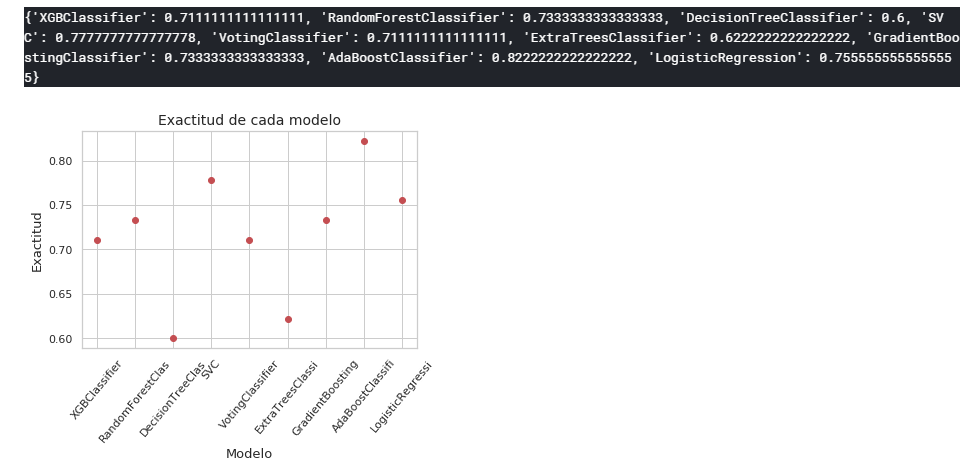

**Si aplicamos los modelos al dataset con todas las visitas, el mejor modelo es ExtratreesClassifier con una exactitud de de 0.87**. Aplicando cross validation al modelo Random Forest no superamos 0,82.

Por lo tanto, **los resultados son sensiblemente mejores incluyendo CDR en el modelo y descartando MMSE** para evitar la posible multicolinealidad. Si solamente dispusieramos de los datos del examen MMSE podríamos también predecir resultados aceptables con varios de los mejores modelos analizados.

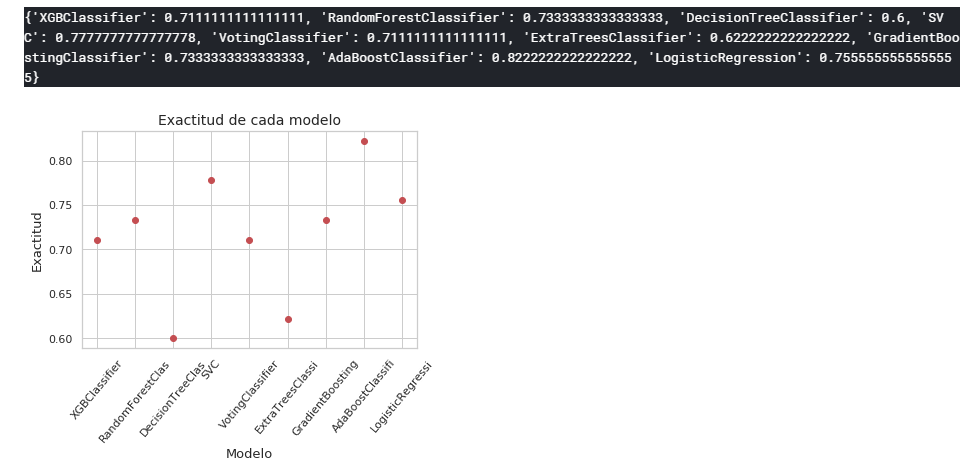

**Conclusiones
**

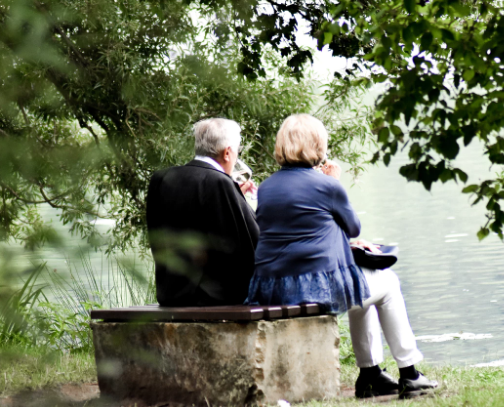

Tras aplicar muchos modelos diferentes a varios datasets, obteniendo siempre los resultados en los conjuntos de datos que el modelo no ha visto y teniendo consistencia y coherencia en entrenamiento, test y validación, hemos constatado una precisión y capacidad predictiva de los modelos bastante buena.

Es clara la influencia de varias de las variables analizadas en el diagnóstico de la demencia, especialmente destacaríamos MMSE y CDR, sin embargo creo que podríamos abrir nuevas líneas de investigación, e incluso obtener resultados mejores y aplicables a pacientes diversos, si pudiéramos aumentar el tamaño de las muestras para elaborar modelos predictivos universalizados, y si pudiéramos medir y añadir a los datos variables y características como las mencionadas en el documento explicativo adjunto, que contextualiza la situación general actual de los diferentes tipos de demencia y del Alzheimer en particular: datos de carácter genético (por ejemplo el gen APOE), cardiovascular, sobre hábitos de vida saludable (consumo de tabaco, alcohol, drogas, etc) y cualquier biomarcador que pudiera permitirnos analizar más hipótesis y relaciones entre dichas características. Llama la atención en este sentido que los datos obtenidos específicamente a través de resonancia magnética y sus variables asociadas no son los que más importancia tienen en los modelos de machine learning analizados, por ello cabe pensar que es posible encontrar indicadores o fuentes de datos alternativos de mayor relevancia. También hay otro tipo de datos extraídos a partir de imágenes del cerebro que pueden ser valoradas incluir, a partir de su análisis en otros estudios, como las matrices de conectividad o el volumen de materia gris.

Por otro lado existen limitaciones en la implementación de un modelo complejo debido a la cantidad del conjunto de datos. Es mejorable también identificar más claramente las diferencias en las variables que podrían haber desempeñado un papel en el resultado. Otro inconveniente que hemos encontrado es la abundacia de datos nulos. Tenemos un gran potencial predictivo si prestamos la atención adecuada al desarrollo del proceso de análisis y limpieza de datos, pero mayor aún si los datos primarios están completos, basados en estudios exhaustivos y lo menos sesgados posible.